# Importing the data
In order to import the data we will use the `fecon236` library, [here](https://github.com/MathSci/fecon236) there's its repo.
[github interesting repo](https://github.com/borisbanushev/stockpredictionai/blob/master/readme2.md)


In [1]:
import fecon236 as fe # library with tools for financial economics
import pandas as pd
import numpy as np
import requests as req # Webscrapping
from bs4 import BeautifulSoup # Webscrapping
import re # Regex
import datetime
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose #importing decomposition method
from statsmodels.tsa.stattools import adfuller

In [2]:
# We do webscrapping to get the stock symbols list of the IBEX 35 index, from Yahoo finance.
url = 'https://finance.yahoo.com/quote/%5EIBEX/components?p=%5EIBEX'

def get_symbols(url):
    html = req.get(url).content 
    soup = BeautifulSoup(html, "lxml")
    table = soup.find_all('a',{'class':'C($c-fuji-blue-1-b) Cur(p) Td(n) Fw(500)'})
    list = [link.attrs['title'] for link in table]
    return list

IBEX = get_symbols(url)


In [89]:
# We do a for loop to get the data of these stocks in the list and put them into a dataframe
df_ibex = pd.DataFrame(index=fe.get(f's4cabk.mc')[-1560:].index)

for stock in IBEX:
    a = pd.Series(data= fe.get(f's4{stock}')['Y'], name=stock[:-3])[-1560:]
    if len(a) == df_ibex.shape[0]: #we will take only stocks without nans
        df_ibex = df_ibex.join(a, how='left')


 ::  Retrieved from Yahoo Finance: CABK.MC
 ::  Retrieved from Yahoo Finance: SAB.MC
 ::  Retrieved from Yahoo Finance: REE.MC
 ::  Retrieved from Yahoo Finance: ELE.MC
 ::  Retrieved from Yahoo Finance: FER.MC
 ::  Retrieved from Yahoo Finance: IAG.MC
 ::  Retrieved from Yahoo Finance: IBE.MC
 ::  Retrieved from Yahoo Finance: COL.MC
 ::  Retrieved from Yahoo Finance: ENG.MC
 ::  Retrieved from Yahoo Finance: AENA.MC
 ::  Retrieved from Yahoo Finance: GRF.MC
 ::  Retrieved from Yahoo Finance: NTGY.MC
 ::  Retrieved from Yahoo Finance: MAP.MC
 ::  Retrieved from Yahoo Finance: MRL.MC
 ::  Retrieved from Yahoo Finance: SAN.MC
 ::  Retrieved from Yahoo Finance: VIS.MC
 ::  Retrieved from Yahoo Finance: CABK.MC
 ::  Retrieved from Yahoo Finance: AMS.MC
 ::  Retrieved from Yahoo Finance: BKT.MC
 ::  Retrieved from Yahoo Finance: TEF.MC
 ::  Retrieved from Yahoo Finance: ANA.MC
 ::  Retrieved from Yahoo Finance: SGRE.MC
 ::  Retrieved from Yahoo Finance: TL5.MC
 ::  Retrieved from Yahoo Fin

# Exploring our dataset

In [90]:
# general overview
df_ibex.head()

SAB      REE        ELE     FER    IAG    IBE      COL  \
T                                                                        
2013-07-15  1.11177   9.9850  16.230000  12.730  3.176  3.851  3.20699   
2013-07-16  1.10581  10.3888  16.260000  12.655  3.140  3.855  3.23478   
2013-07-17  1.10506  10.6675  16.000000  12.595  3.180  3.817  3.17920   
2013-07-18  1.14009  10.6488  16.370001  12.890  3.290  3.894  3.16252   
2013-07-19  1.13338  10.8450  16.459999  12.950  3.352  3.901  3.15141   

                  ENG      GRF    MAP  ...      TEF        ANA   SGRE    TL5  \
T                                      ...                                     
2013-07-15  18.059999  15.5675  2.708  ...  9.81753  34.875000  4.890  7.677   
2013-07-16  18.170000  15.3600  2.675  ...  9.71372  35.410000  4.792  7.645   
2013-07-17  18.250000  15.3700  2.649  ...  9.65440  36.025002  4.632  7.558   
2013-07-18  18.750000  15.5175  2.708  ...  9.78985  35.455002  4.720  7.814   
2013-07-19  18.920000  15.3675  2.673  ...  9.81654  34.055000  4.814  7.920   

             BBVA    MEL        ITX        ACS    ACX        MTS  
T                                                                 
2013-07-15  6.362  6.220  19.832001  19.735001  7.187  18.792299  
2013-07-16  6.244  6.215  19.511999  19.695000  7.283  19.077299  
2013-07-17  6.300  6.180  19.604000  19.889999  7.300  19.284901  
2013-07-18  6.480  6.410  19.718000  20.495001  7.360  19.720600  
2013-07-19  6.461  6.250  19.606001  20.495001  7.302  19.822399  

[5 rows x 25 columns]

In [91]:
# checking dtypes ans null values
df_ibex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1560 entries, 2013-07-15 to 2019-08-20
Data columns (total 25 columns):
SAB     1560 non-null float64
REE     1559 non-null float64
ELE     1560 non-null float64
FER     1560 non-null float64
IAG     1559 non-null float64
IBE     1560 non-null float64
COL     1560 non-null float64
ENG     1560 non-null float64
GRF     1560 non-null float64
MAP     1560 non-null float64
SAN     1560 non-null float64
VIS     1560 non-null float64
CABK    1560 non-null float64
AMS     1560 non-null float64
BKT     1560 non-null float64
TEF     1560 non-null float64
ANA     1560 non-null float64
SGRE    1560 non-null float64
TL5     1560 non-null float64
BBVA    1560 non-null float64
MEL     1560 non-null float64
ITX     1560 non-null float64
ACS     1560 non-null float64
ACX     1560 non-null float64
MTS     1560 non-null float64
dtypes: float64(25)
memory usage: 356.9 KB


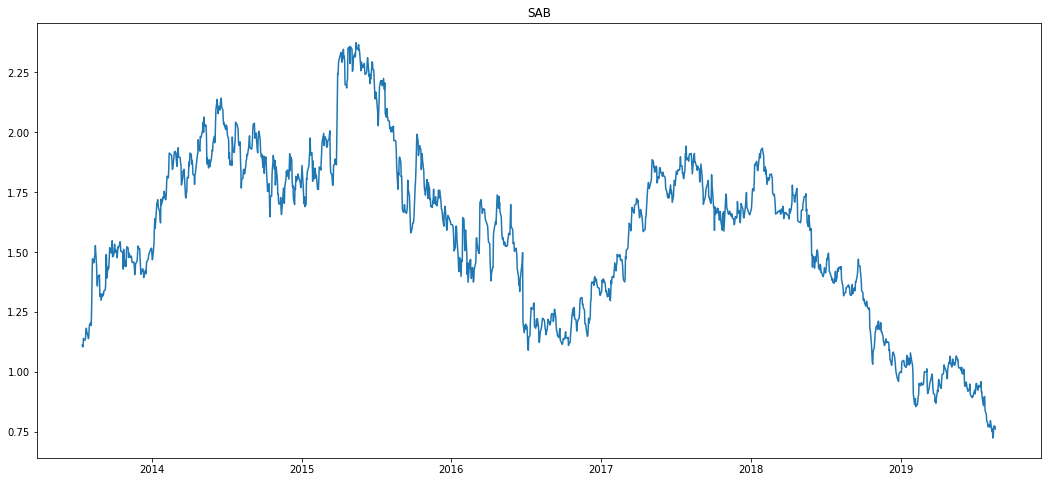

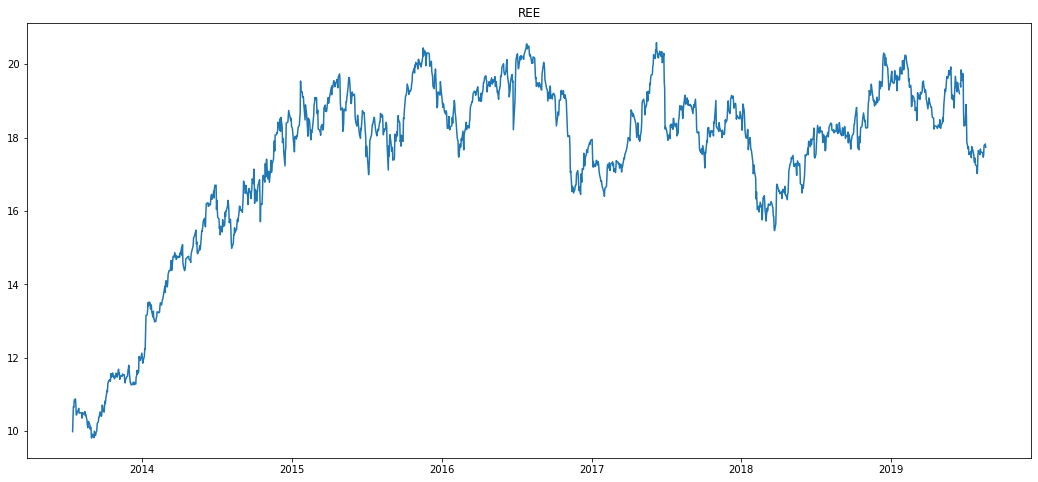

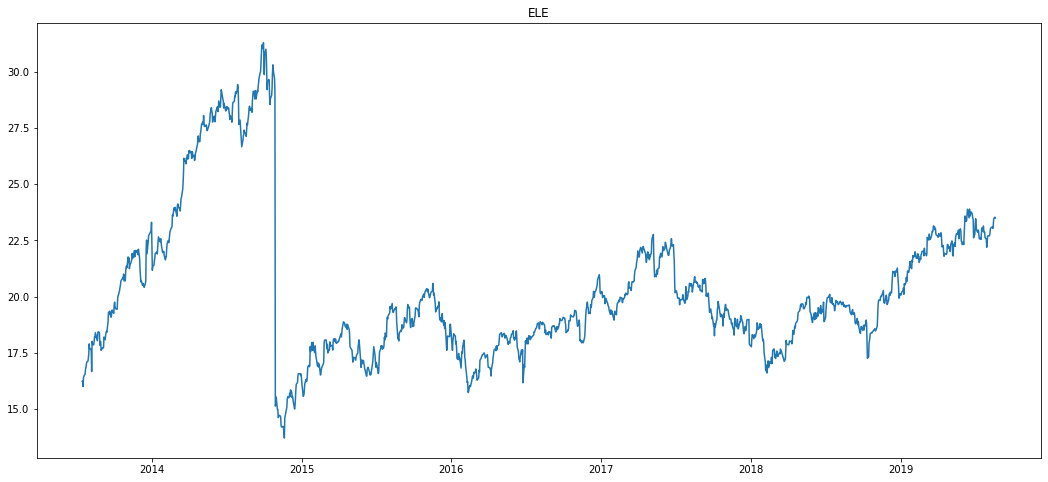

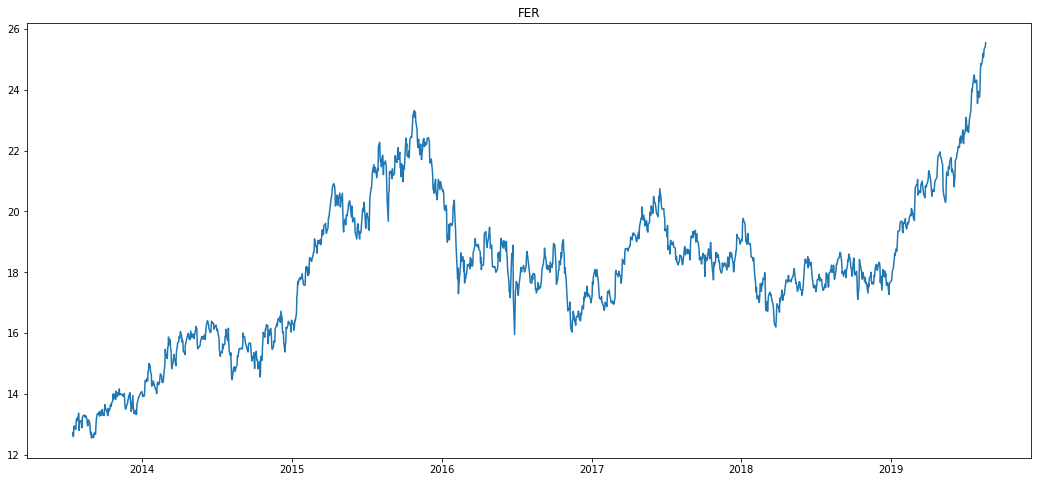

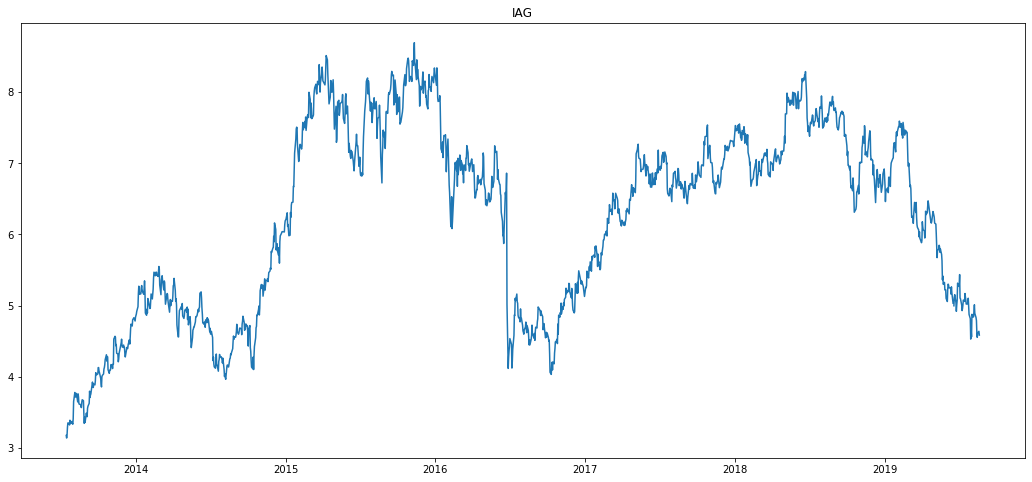

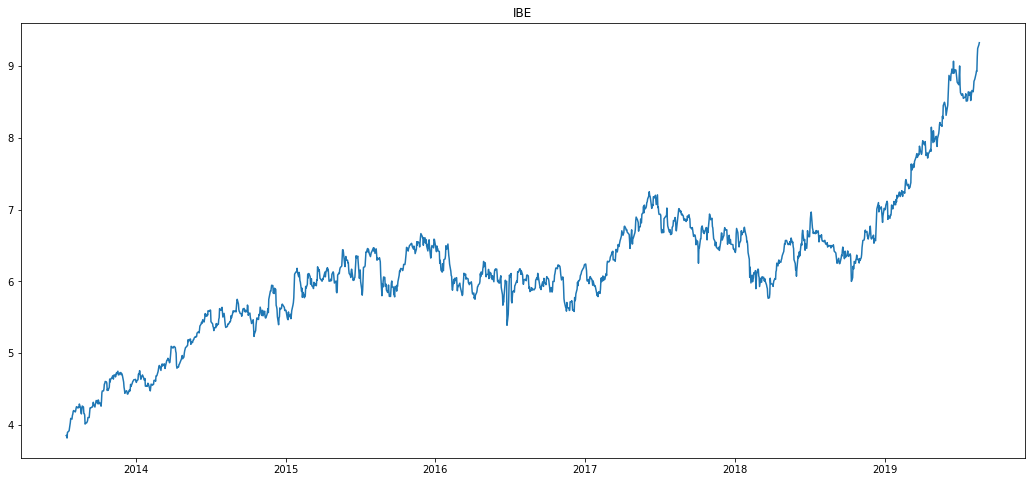

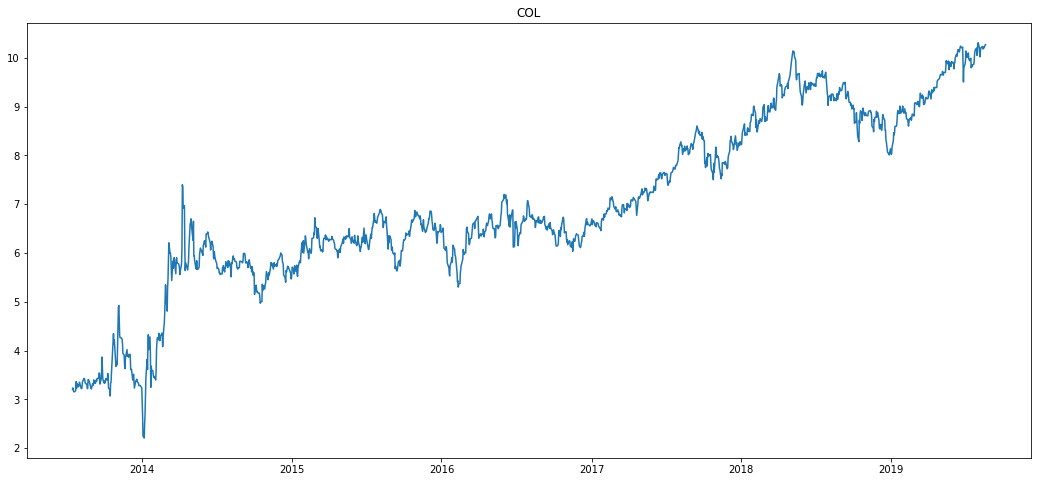

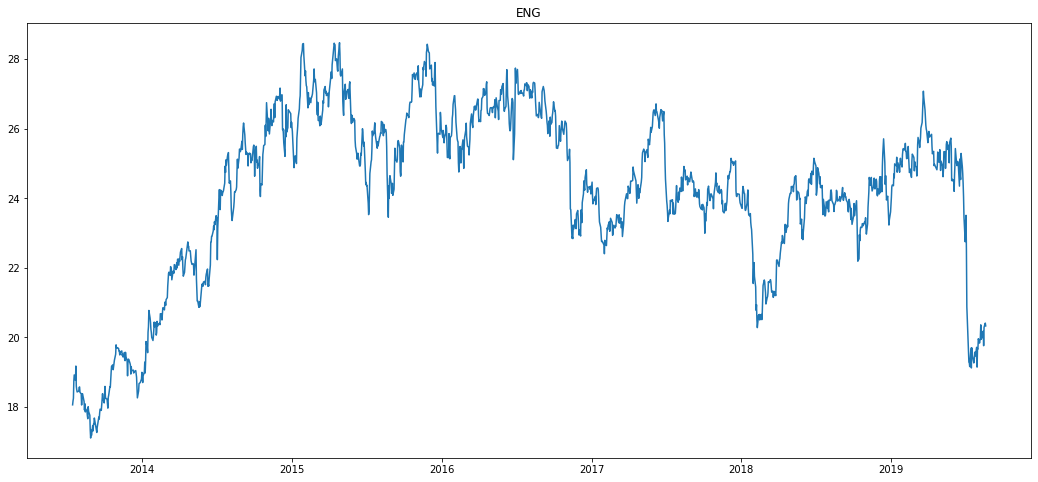

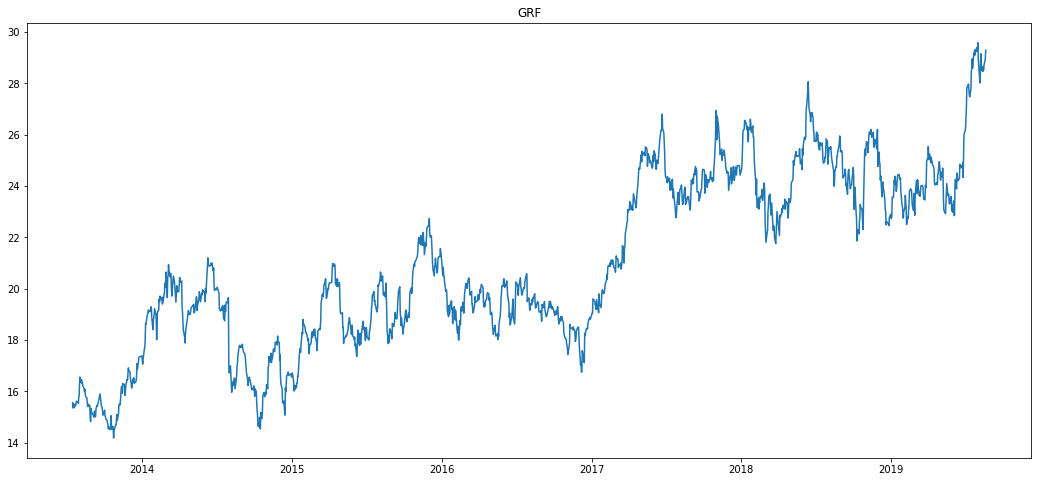

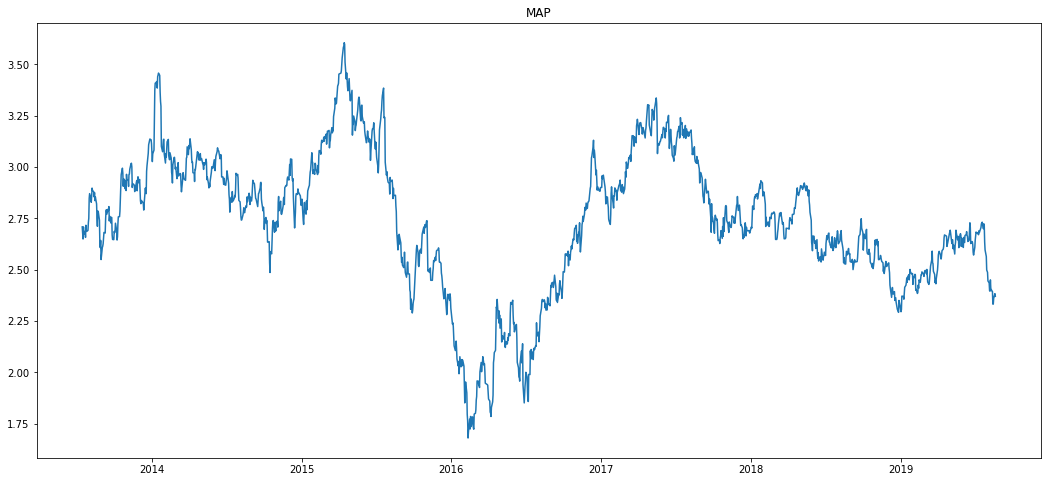

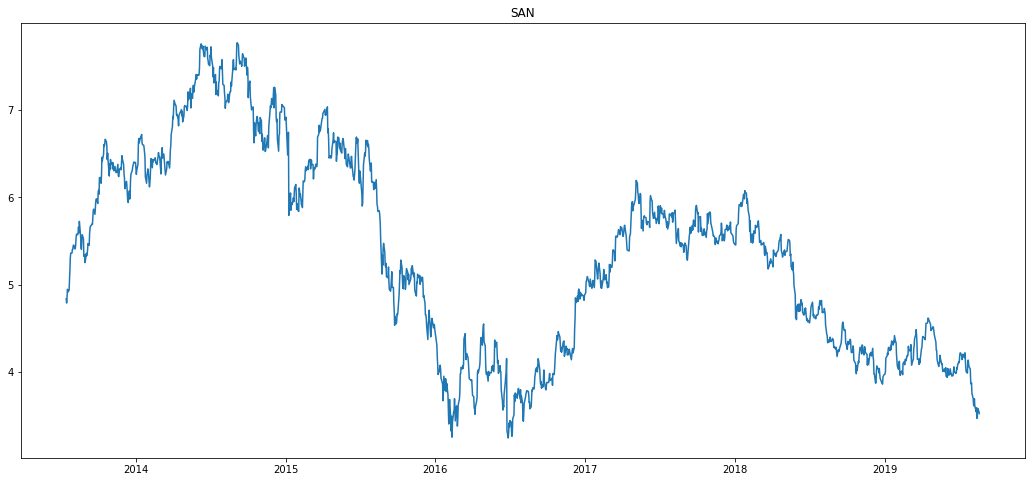

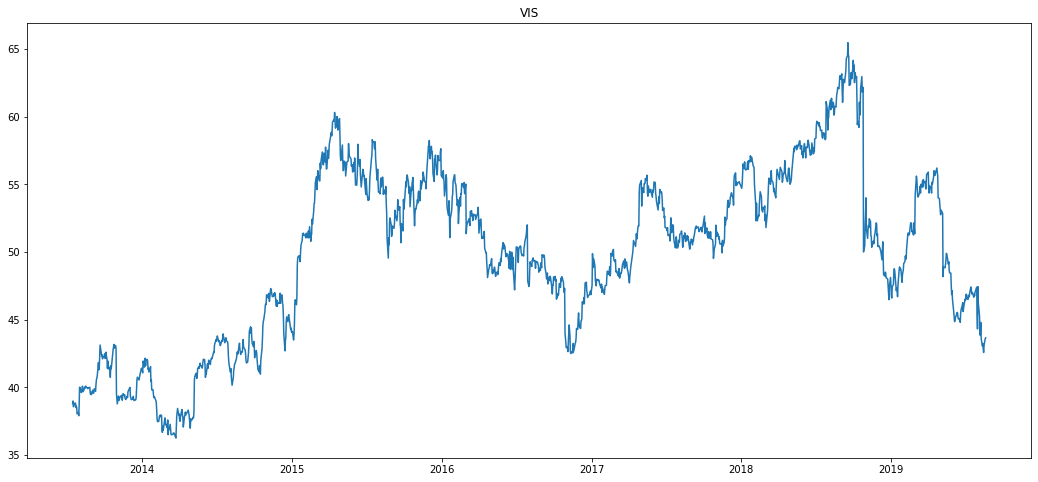

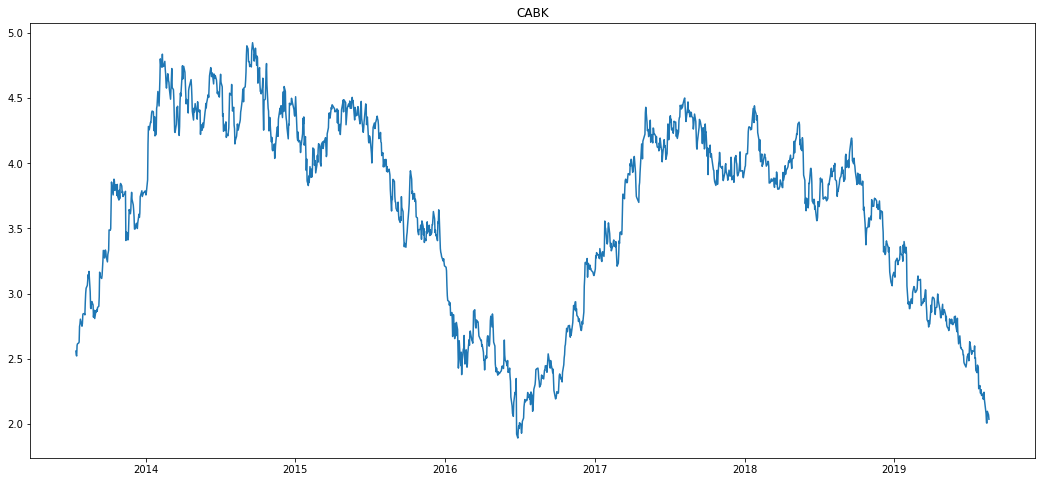

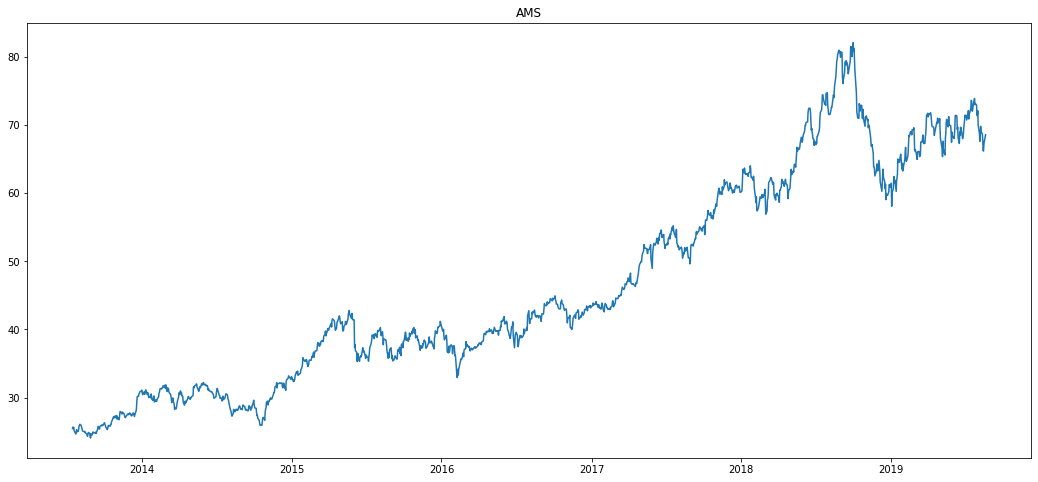

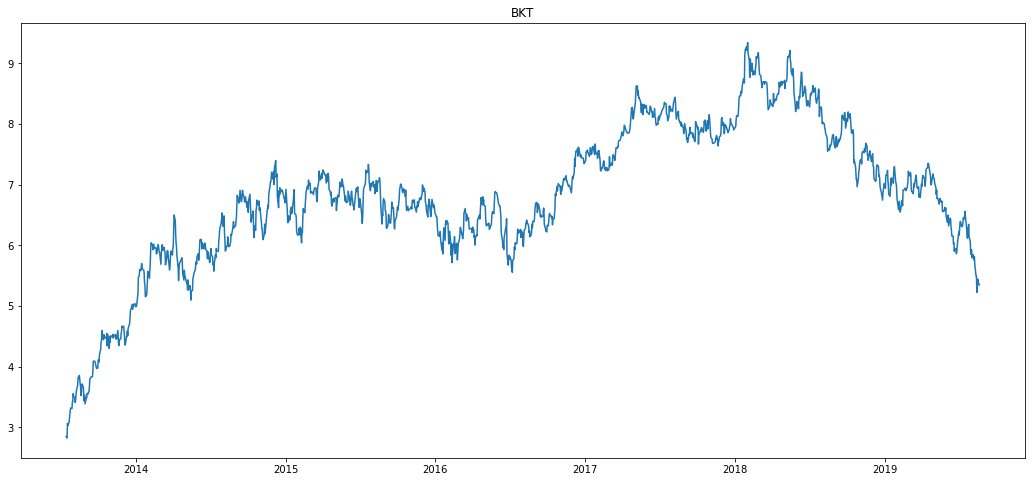

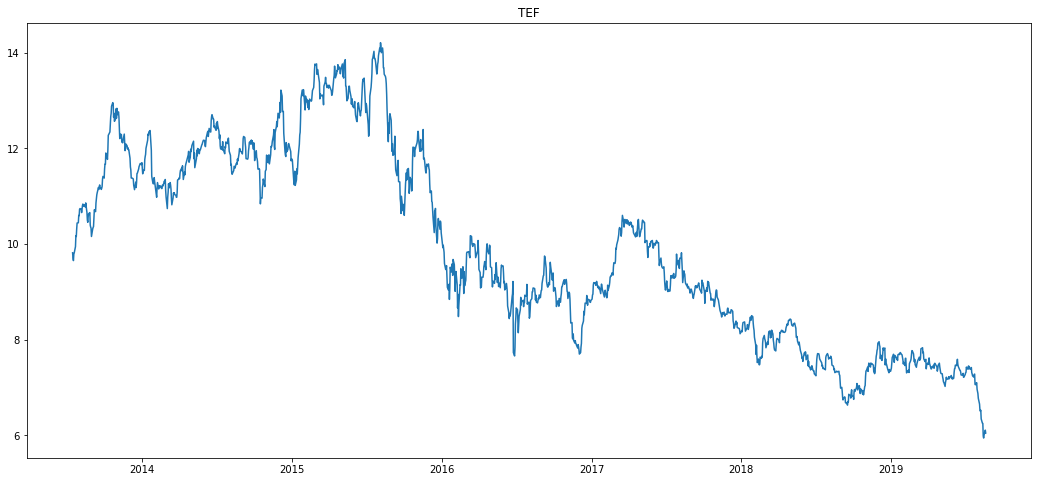

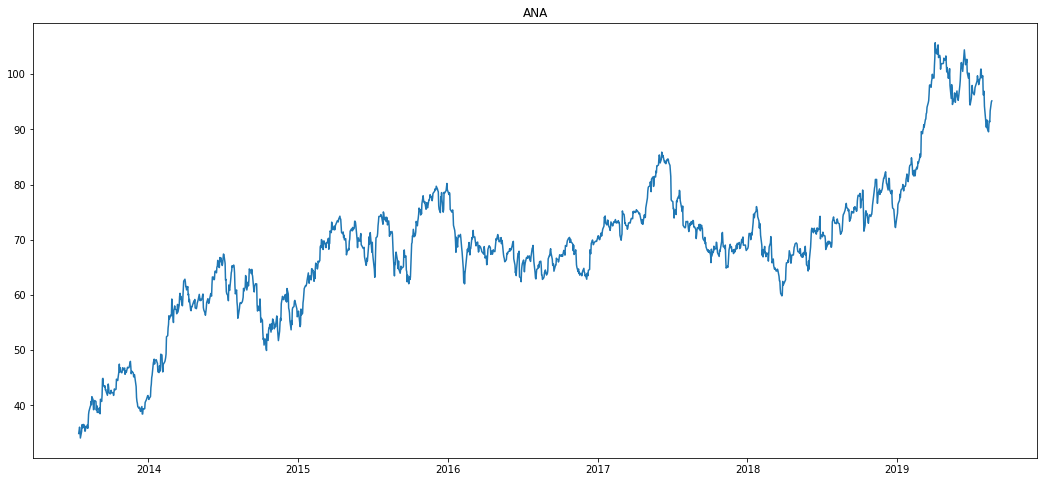

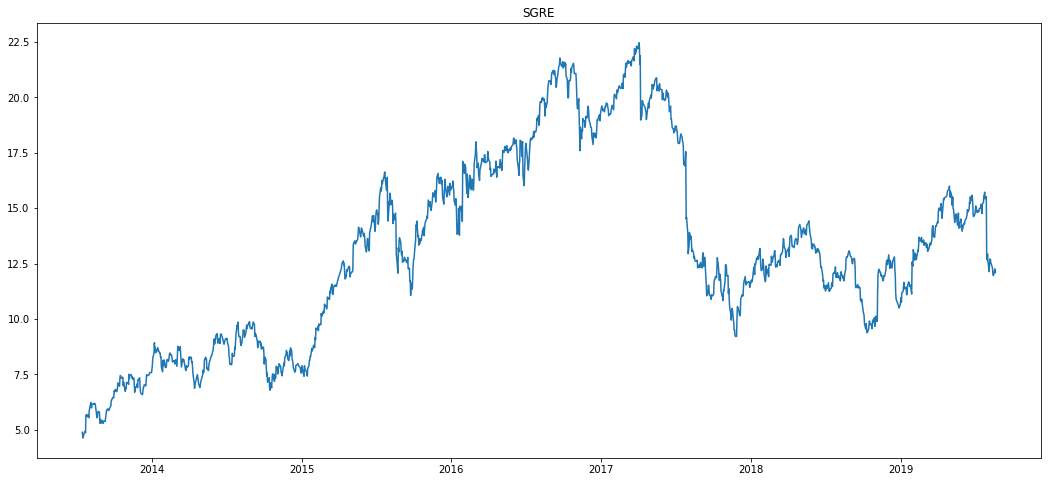

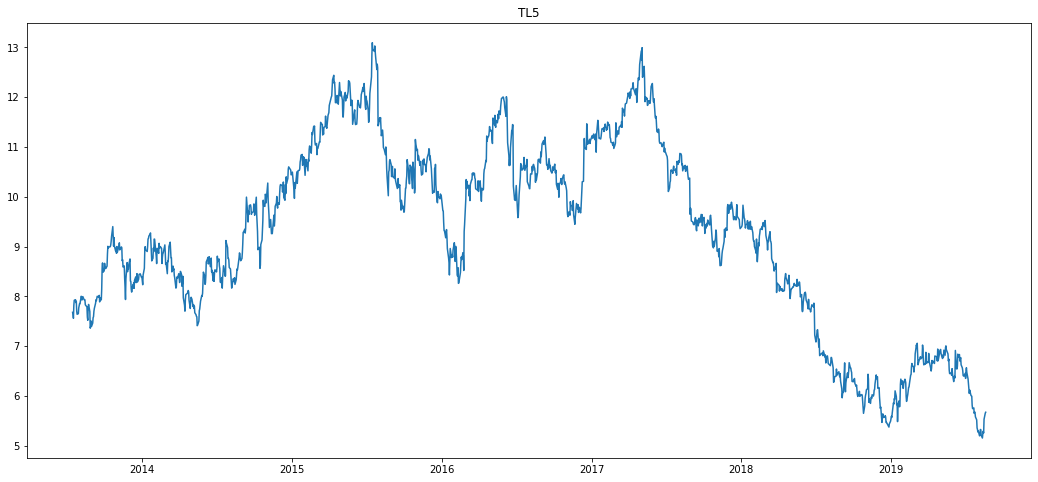

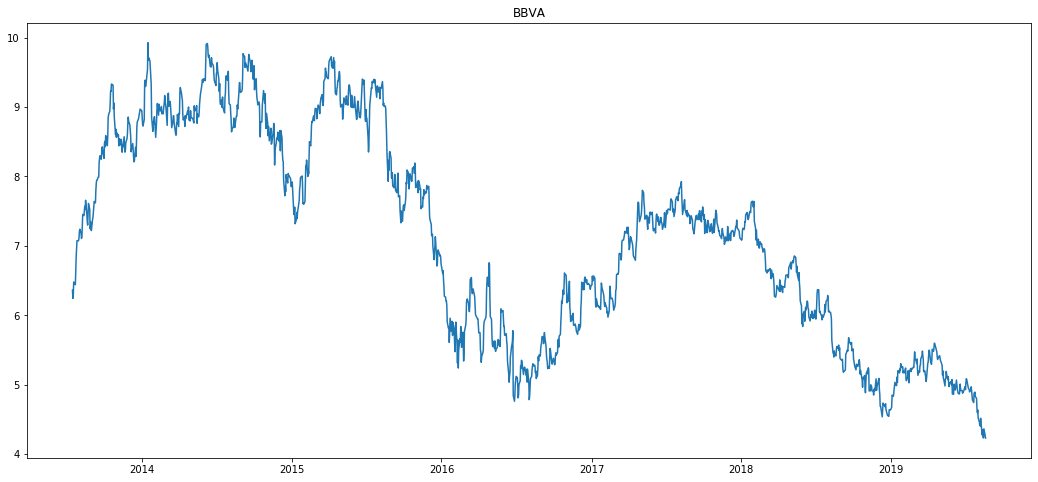

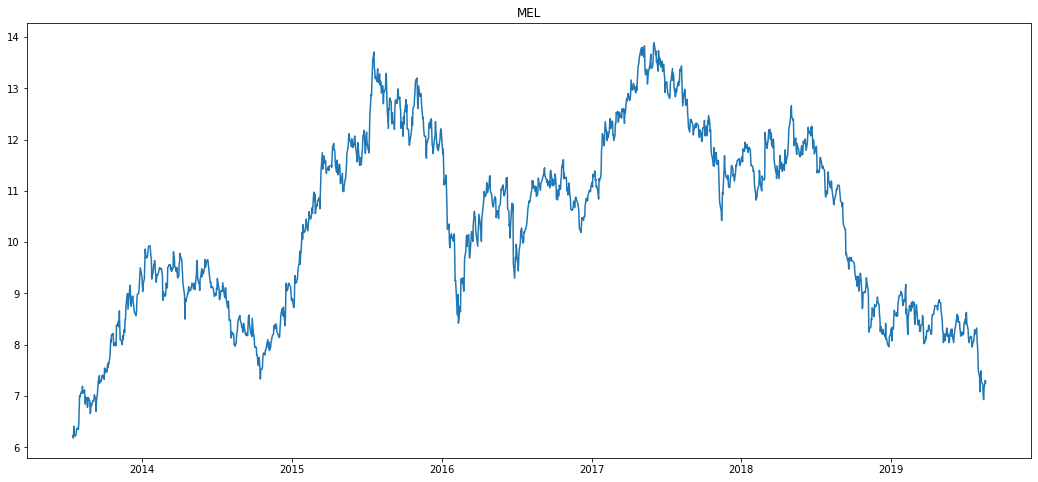

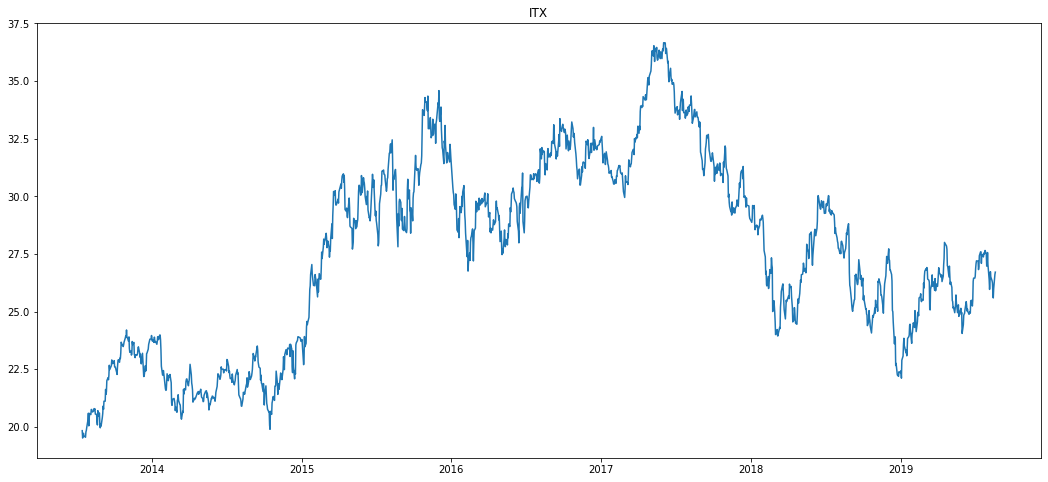

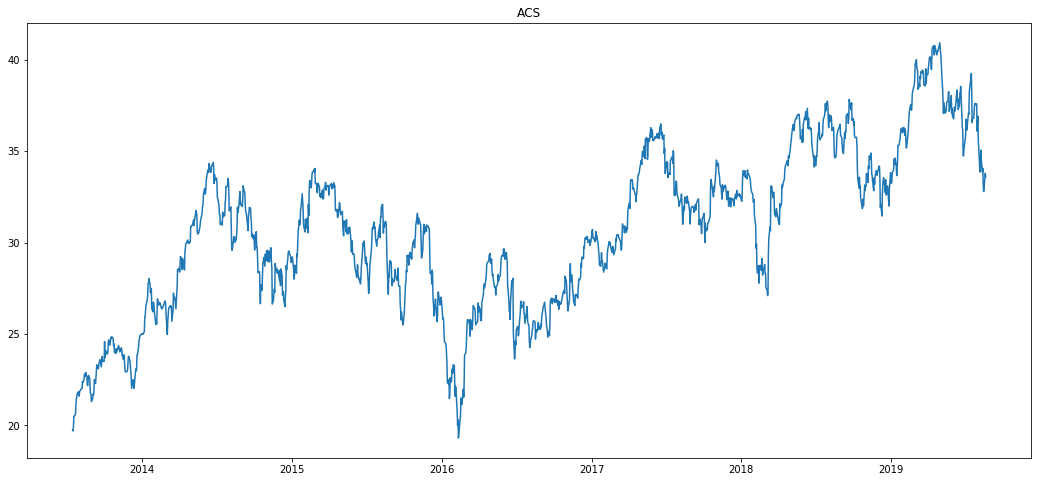

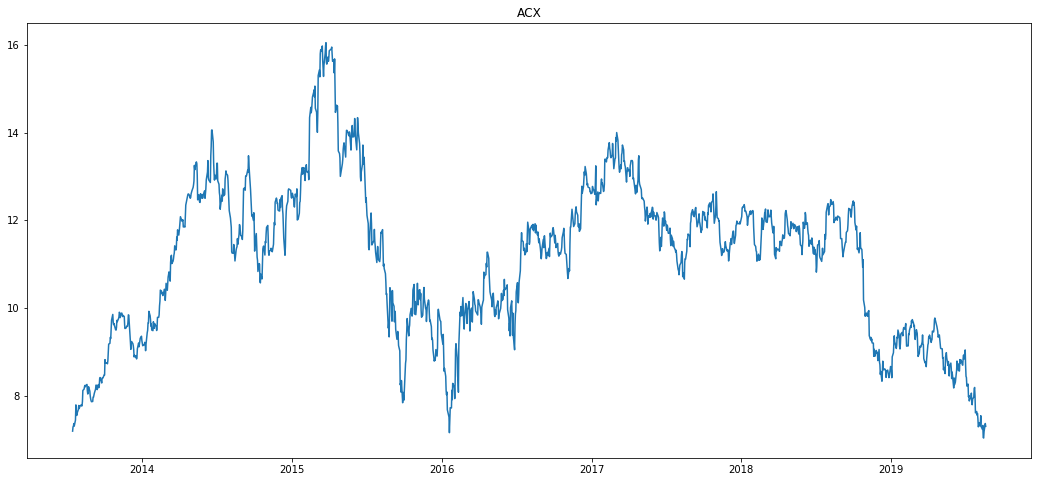

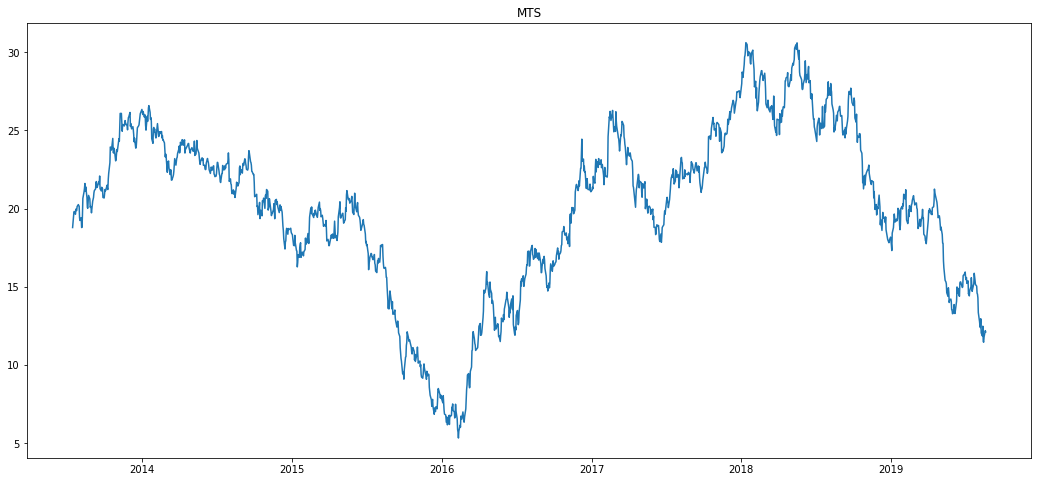

In [92]:
# we will plot the graphs
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 8

for stock in df_ibex.columns:
    plt.plot(df_ibex[stock])
    plt.title(stock, animated=True)
    plt.show()

# Decomposition and Dickey-Fuller test
With the decomposition we will eliminate seasonality and trend, after that with the test we will check which are the most stationary stocks.

In [93]:
#function that returns a test on stationarity

def test_stationarity(timeseries, column): 
    
    #Determing rolling statistics
    rolmean = timeseries[column].rolling(60).mean()
    rolstd = timeseries[column].rolling(60).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries[column], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best' )
    plt.title(f'Rolling Mean & Standard Deviation: {column}')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[column])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def DickeyFuller(timeseries, column):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[column])
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

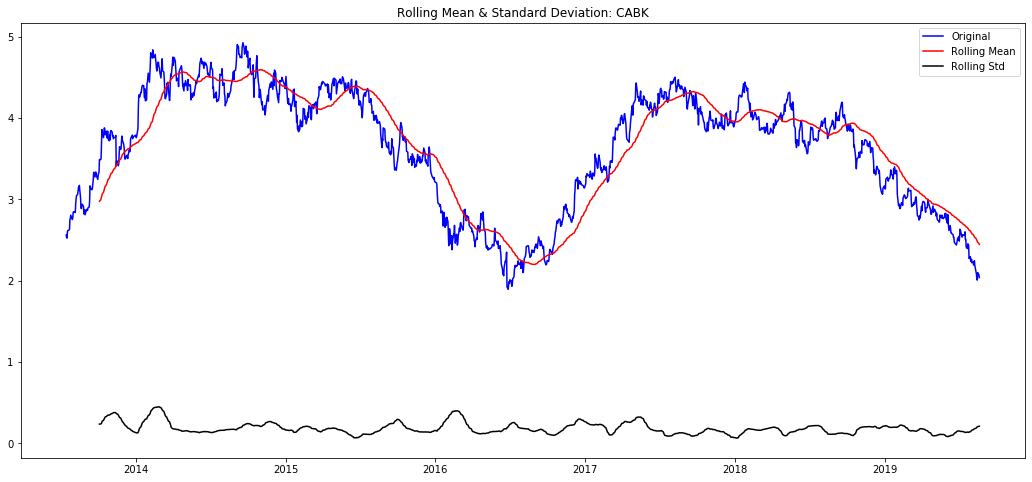

Results of Dickey-Fuller Test:
Test Statistic                   -1.246786
p-value                           0.653153
#Lags Used                        5.000000
Number of Observations Used    1554.000000
Critical Value (1%)              -3.434565
Critical Value (5%)              -2.863402
Critical Value (10%)             -2.567761
dtype: float64


In [94]:
# testing an example
test_stationarity(df_ibex, 'CABK')

#### We have no stationarity, the Test Statistic is over all the critical values.

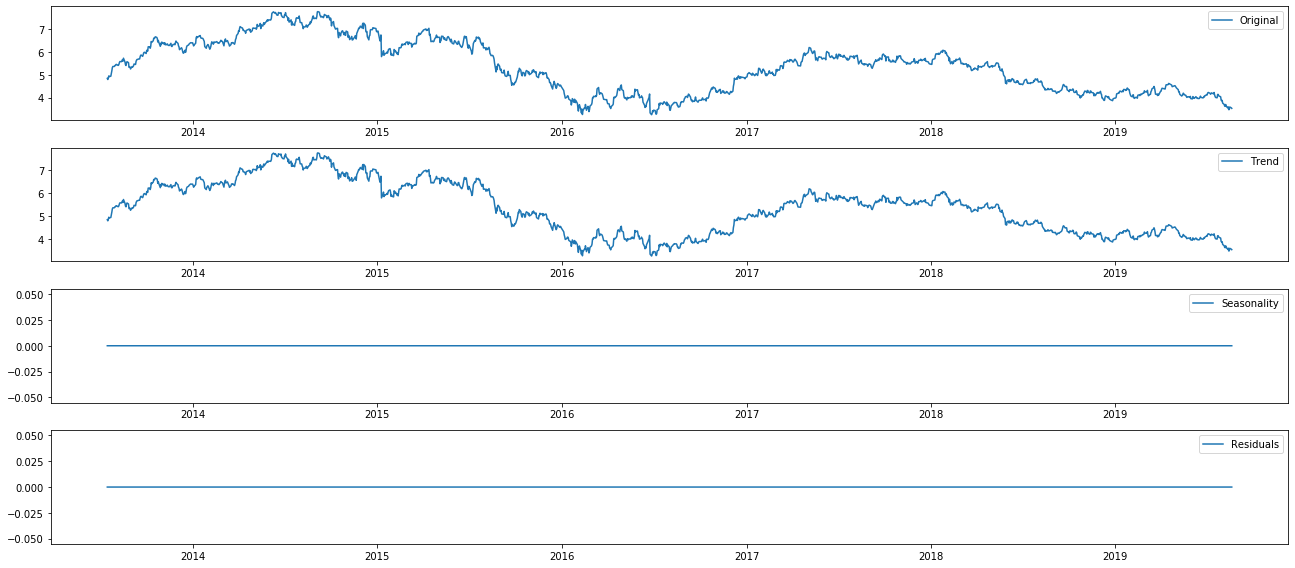

In [95]:
#WE'LL TRY TO DECOMPOSE THE EXAMPLE AND DOING THE TEST AGAIN AFTERWARDS

decomposition = seasonal_decompose(df_ibex['SAN'], freq=1) #decomposing with the method

#separing in variables all the results from decomposition.

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plotting the results
plt.subplot(411)
plt.plot(df_ibex['SAN'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

#### The decomposition is not working as it may not identify any seasonality.

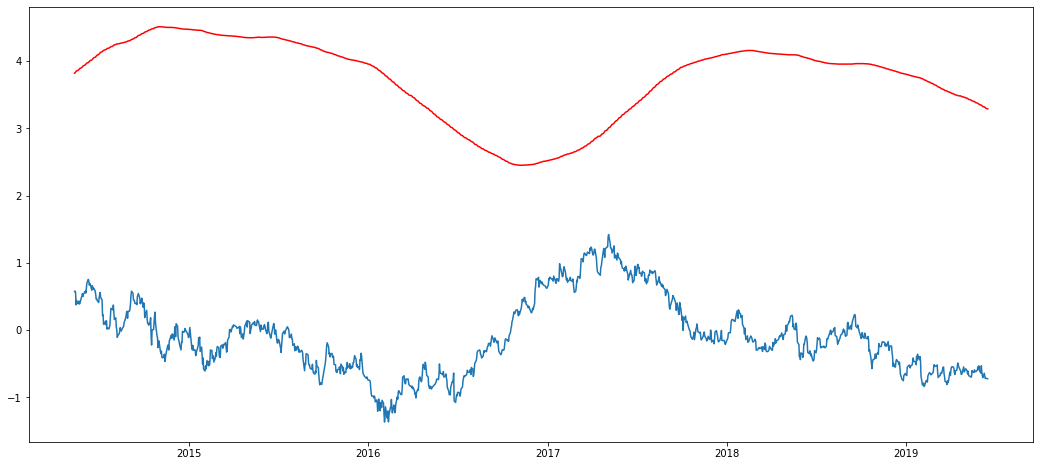

In [157]:
# WE'LL TRY TO ELIMINATE TREND WITH A SIMPLE MOVING AVERAGE
sma = df_ibex.rolling(210).mean()
sma_df = df_ibex - sma
sma_df.dropna(inplace=True)
sma.dropna(inplace=True)
plt.plot(sma_df['CABK'])
plt.plot(sma['CABK'], 'r')

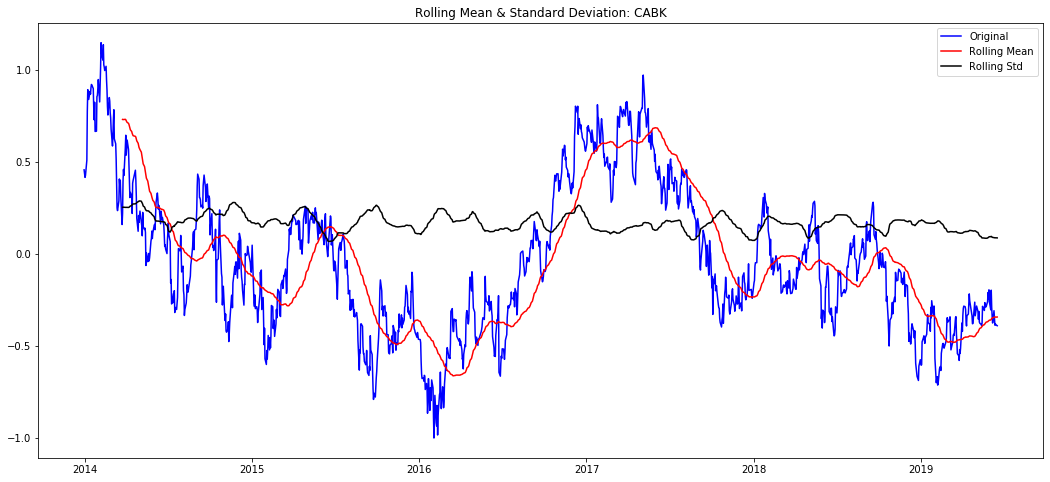

Results of Dickey-Fuller Test:
Test Statistic                   -3.082187
p-value                           0.027900
#Lags Used                        5.000000
Number of Observations Used    1389.000000
Critical Value (1%)              -3.435067
Critical Value (5%)              -2.863623
Critical Value (10%)             -2.567879
dtype: float64


In [104]:
#we'll do the stationarity test now
test_stationarity(sma_df, 'CABK')

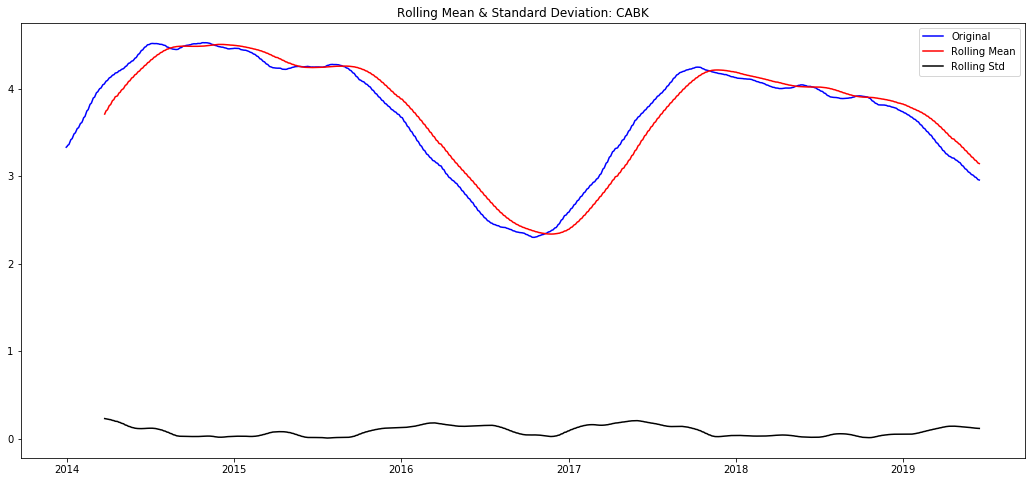

Results of Dickey-Fuller Test:
Test Statistic                   -2.755075
p-value                           0.064983
#Lags Used                       15.000000
Number of Observations Used    1379.000000
Critical Value (1%)              -3.435101
Critical Value (5%)              -2.863638
Critical Value (10%)             -2.567887
dtype: float64


In [132]:
test_stationarity(sma, 'CABK')

#### Now we have a stationary dataset
We'll do ARIMA now, for the SMA and afterwards the resampled data.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


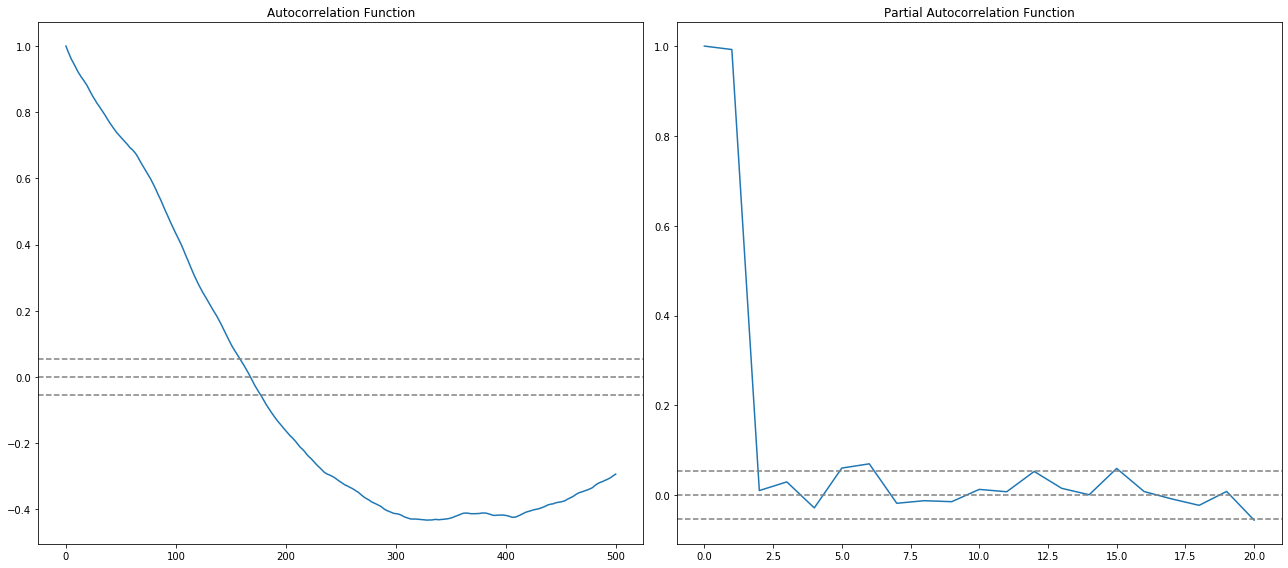

In [159]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(sma_df['CABK'], nlags=500)
lag_pacf = pacf(sma_df['CABK'], nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sma)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sma)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(sma)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(sma)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


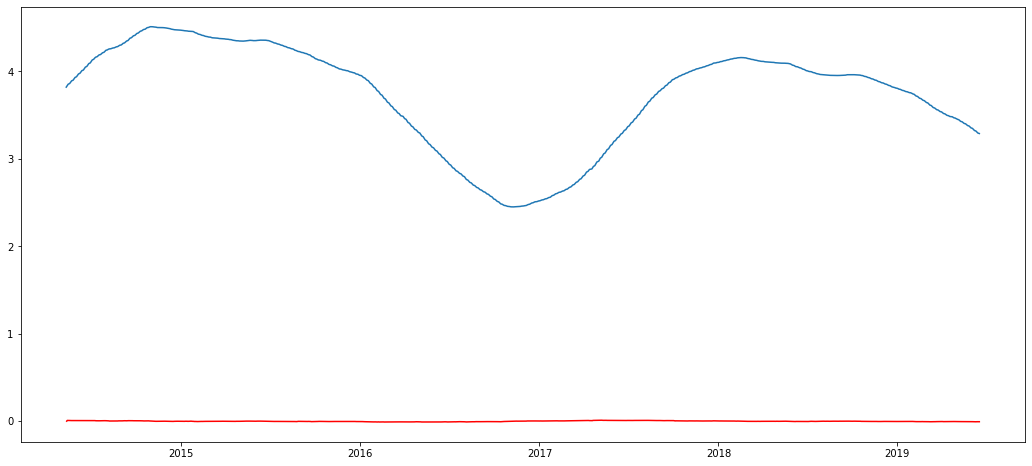

In [169]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(sma['CABK'], order=(2, 1, 10))  
results_ARIMA = model.fit(disp=0)  
plt.plot(sma['CABK'])
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_differencing['#Passengers'])**2))

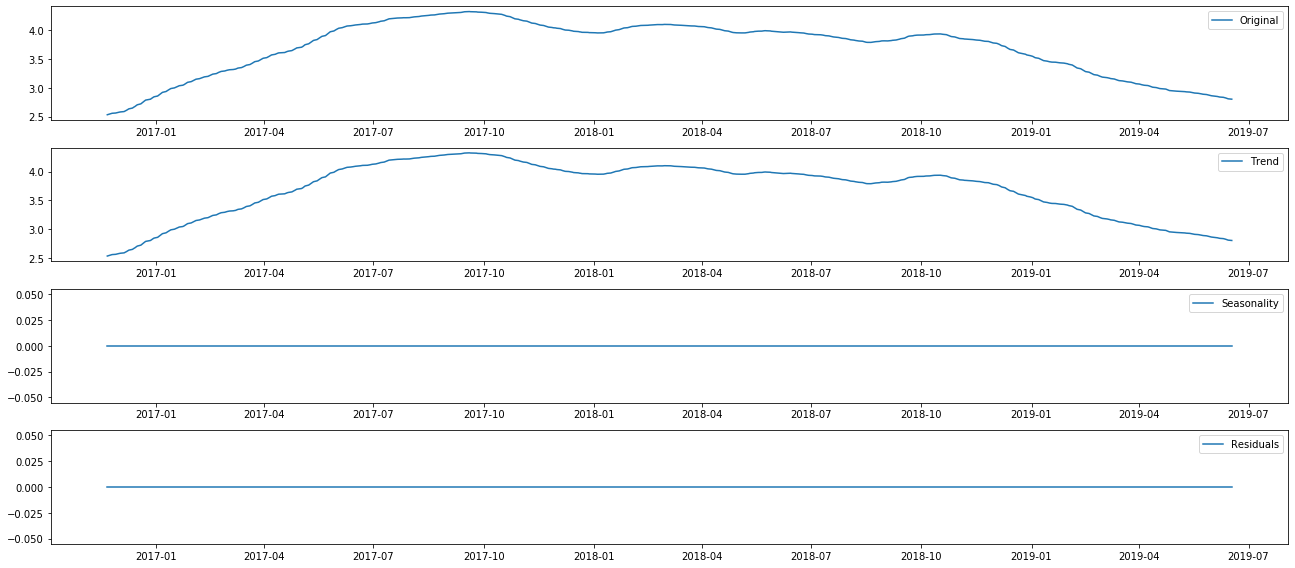

In [98]:
decomposition = seasonal_decompose(sma['CABK'][800:], freq=1) #decomposing with the method

#separing in variables all the results from decomposition.

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plotting the results
plt.subplot(411)
plt.plot(sma['CABK'][800:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

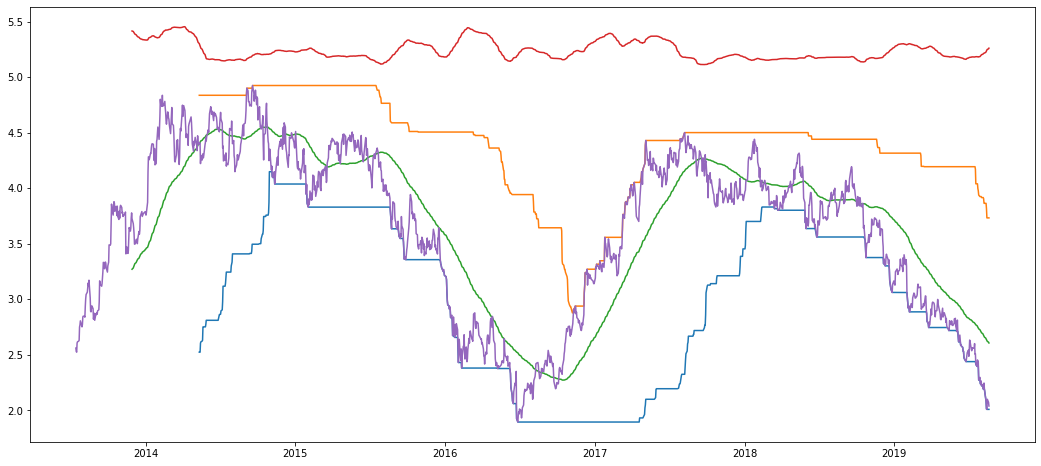

In [173]:
plt.plot(df_ibex['CABK'].rolling(210).min())
plt.plot(df_ibex['CABK'].rolling(210).max())
plt.plot(df_ibex['CABK'].rolling(100).mean())
plt.plot(df_ibex['CABK'].rolling(100).std()+5)
plt.plot(df_ibex['CABK'])

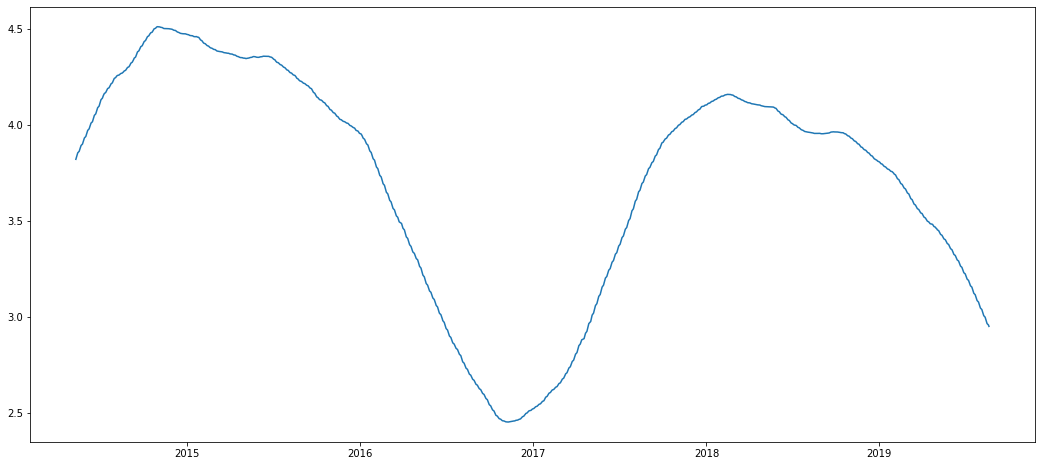

In [100]:
plt.plot(df_ibex['CABK'].rolling(210).mean().dropna())

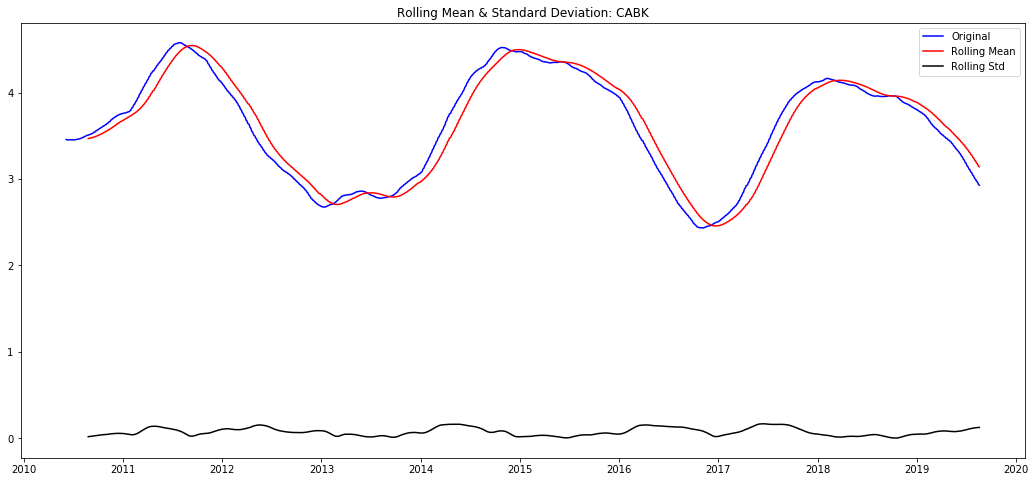

Results of Dickey-Fuller Test:
Test Statistic                   -4.002114
p-value                           0.001399
#Lags Used                        1.000000
Number of Observations Used    2353.000000
Critical Value (1%)              -3.433132
Critical Value (5%)              -2.862769
Critical Value (10%)             -2.567424
dtype: float64


In [55]:
test_stationarity(df_ibex.rolling(200).mean().dropna(), 'CABK')

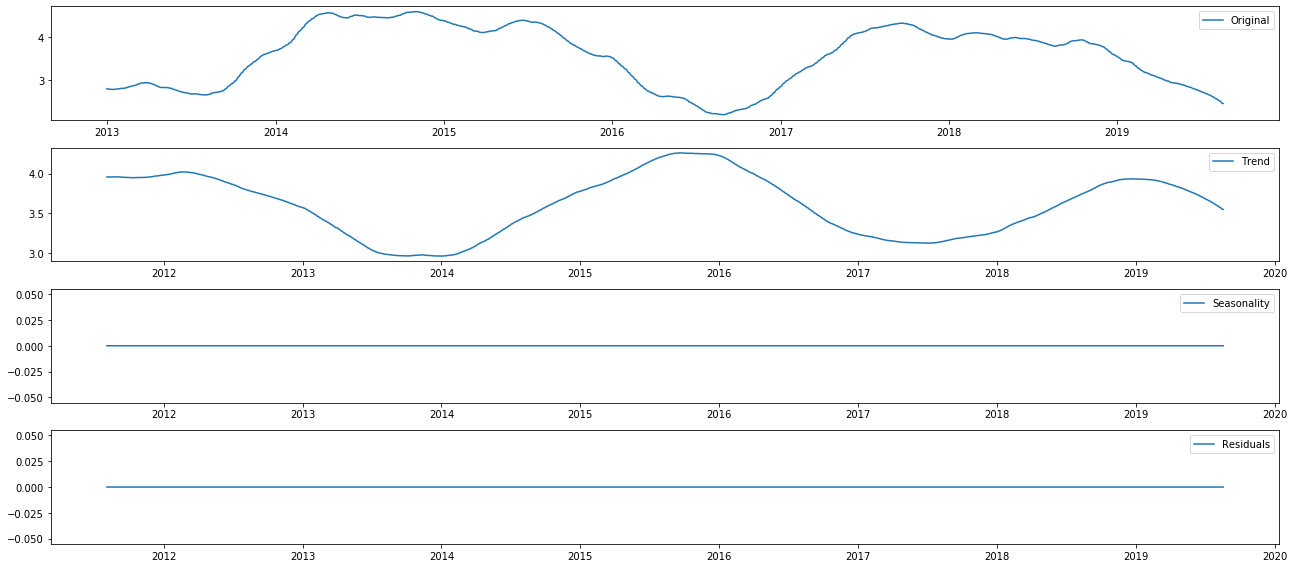

In [71]:
decomposition = seasonal_decompose(df_ibex.rolling(500).mean().dropna()['CABK'], freq=1) #decomposing with the method

#separing in variables all the results from decomposition.

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plotting the results
plt.subplot(411)
plt.plot(sma['CABK'][800:], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

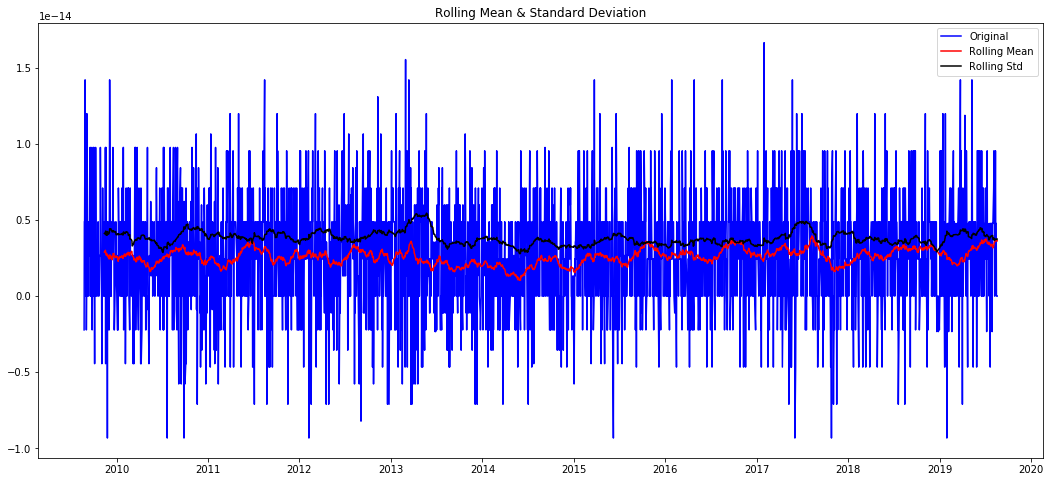

Results of Dickey-Fuller Test:
Test Statistic                -1.637272e+01
p-value                        2.800159e-29
#Lags Used                     2.700000e+01
Number of Observations Used    2.526000e+03
Critical Value (1%)           -3.432941e+00
Critical Value (5%)           -2.862685e+00
Critical Value (10%)          -2.567379e+00
dtype: float64


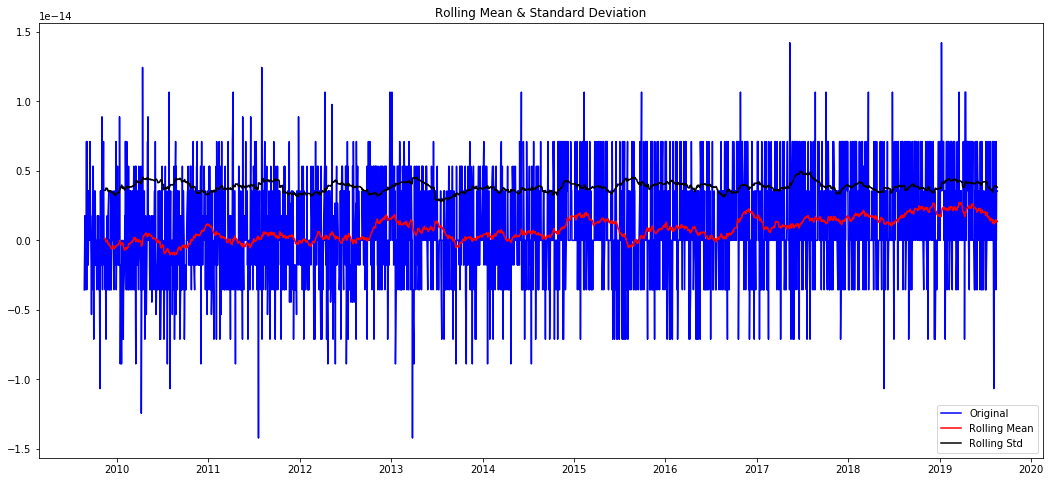

Results of Dickey-Fuller Test:
Test Statistic                  -31.090033
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2527.000000
Critical Value (1%)              -3.432940
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


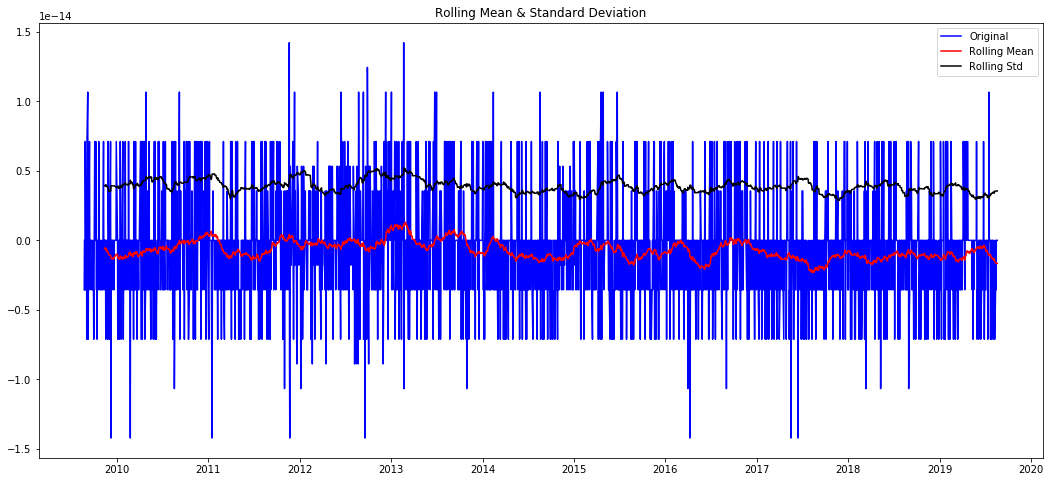

Results of Dickey-Fuller Test:
Test Statistic                  -27.779916
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    2528.000000
Critical Value (1%)              -3.432939
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


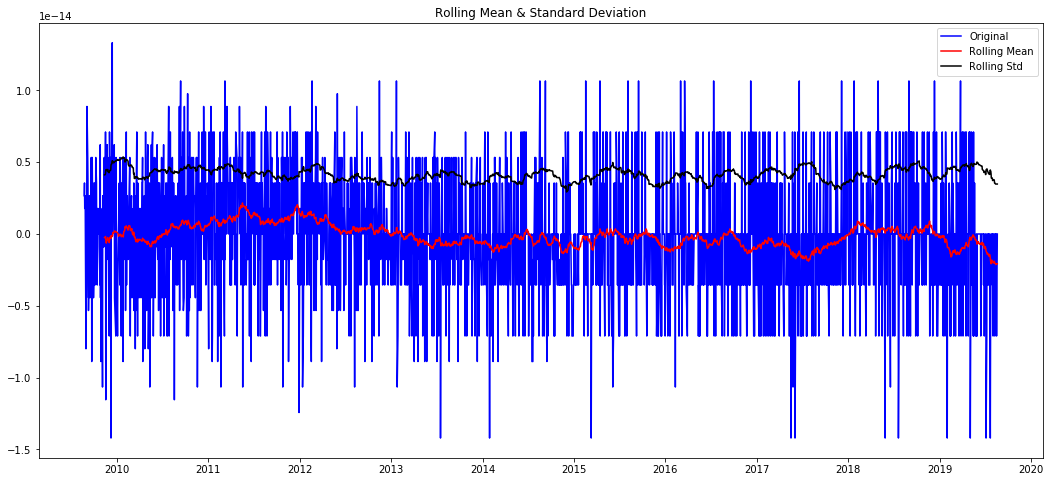

Results of Dickey-Fuller Test:
Test Statistic                  -25.605928
p-value                           0.000000
#Lags Used                       24.000000
Number of Observations Used    2529.000000
Critical Value (1%)              -3.432938
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


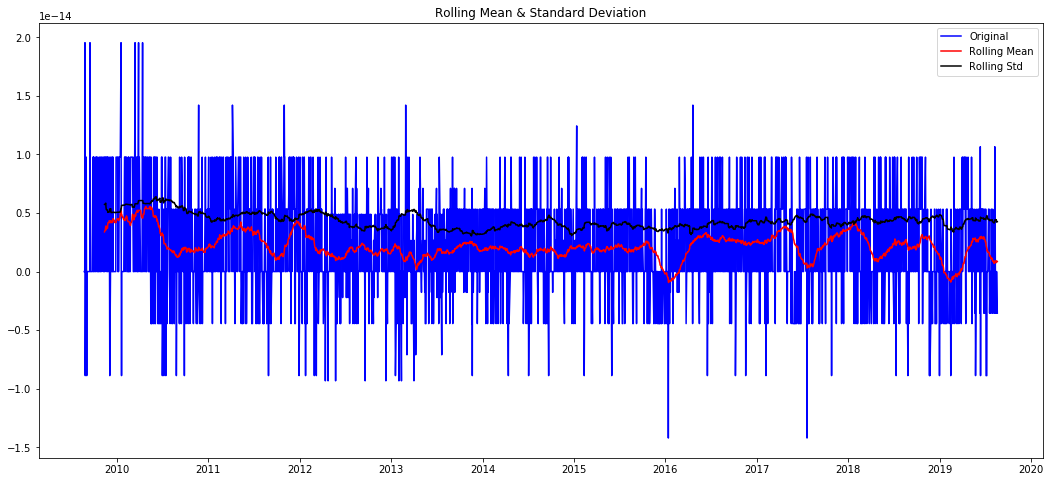

Results of Dickey-Fuller Test:
Test Statistic                  -22.624421
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    2528.000000
Critical Value (1%)              -3.432939
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


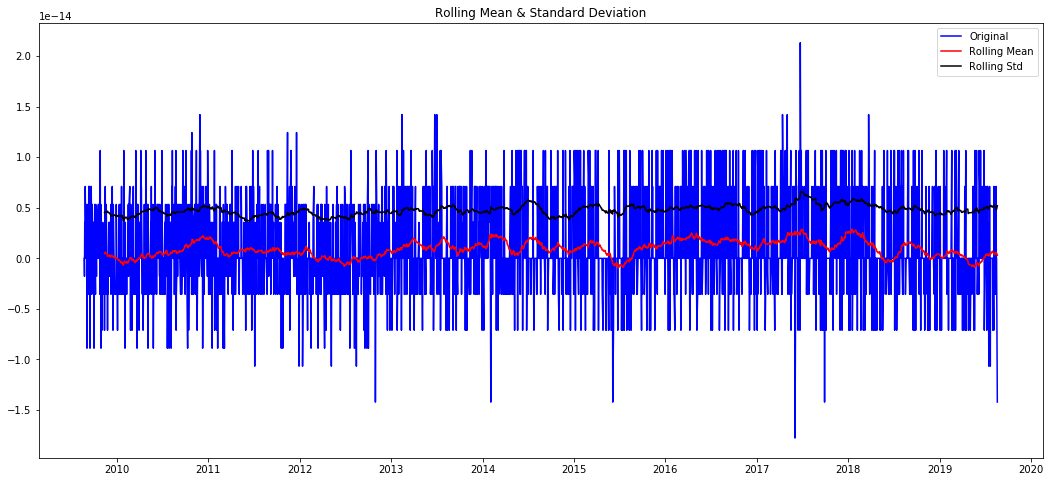

Results of Dickey-Fuller Test:
Test Statistic                  -23.077398
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


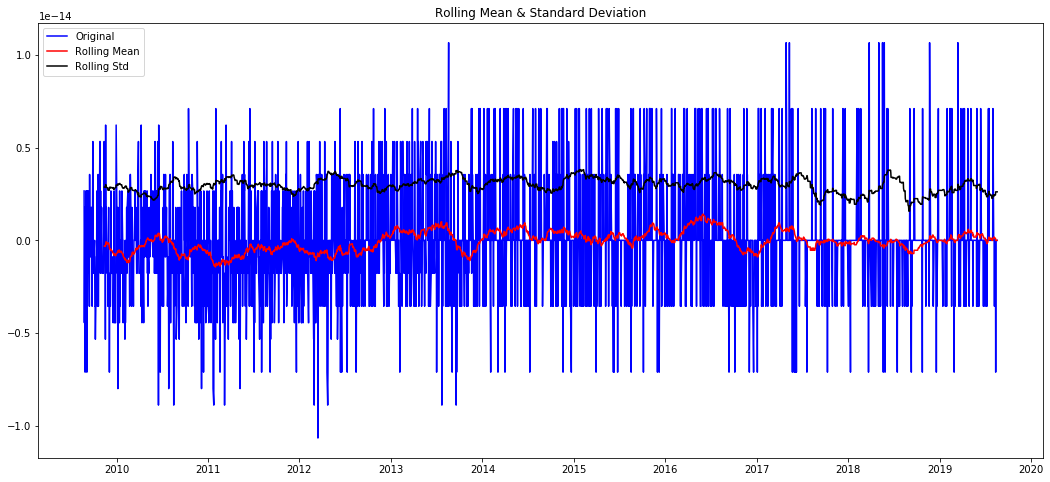

Results of Dickey-Fuller Test:
Test Statistic                  -31.645615
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


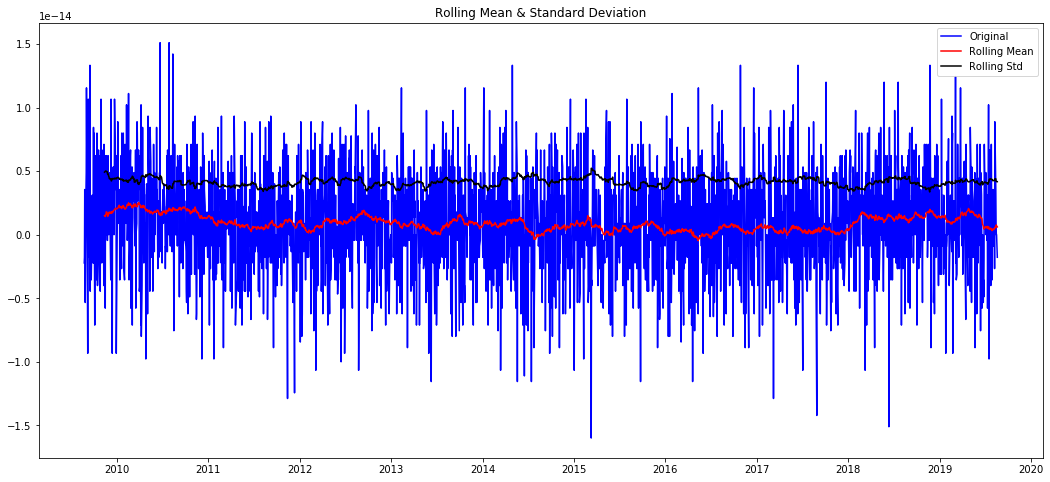

Results of Dickey-Fuller Test:
Test Statistic                  -30.597239
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2527.000000
Critical Value (1%)              -3.432940
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


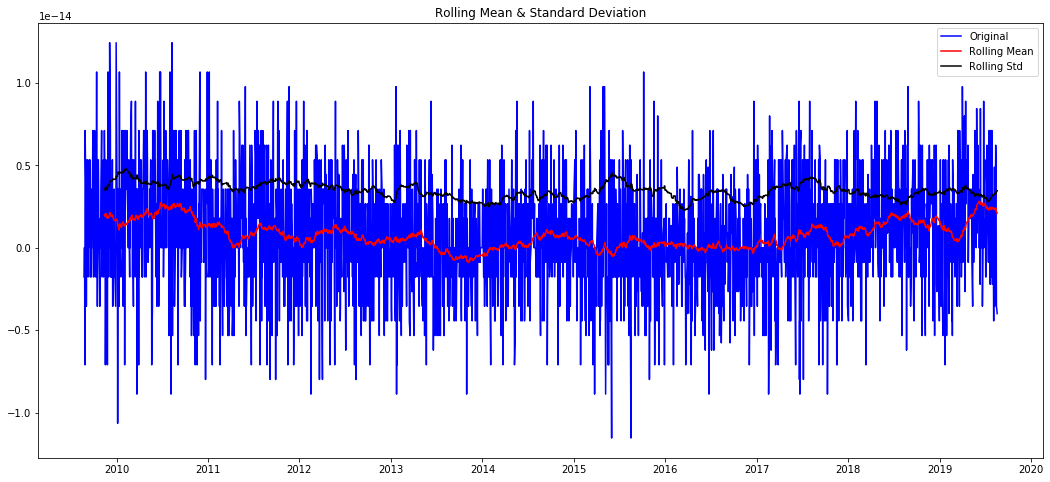

Results of Dickey-Fuller Test:
Test Statistic                  -30.616977
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


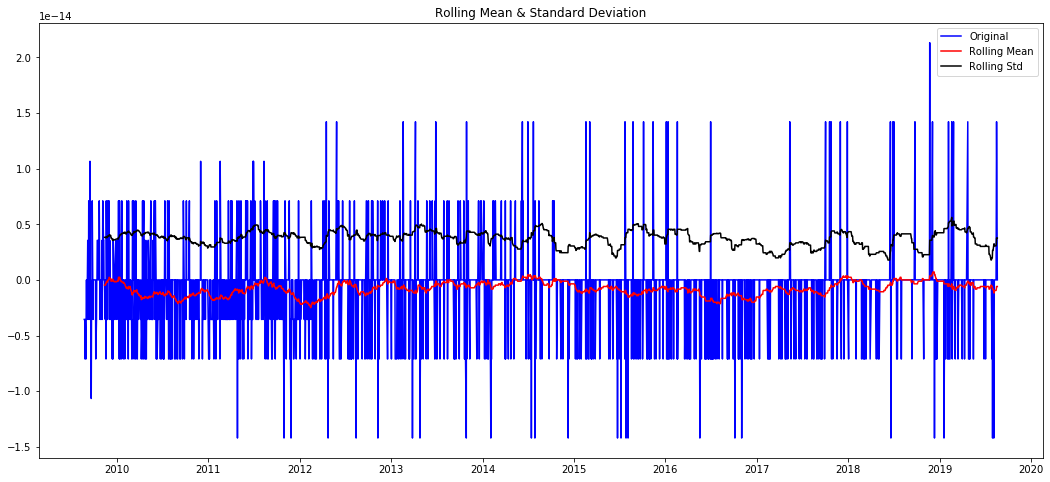

Results of Dickey-Fuller Test:
Test Statistic                  -50.245421
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2553.000000
Critical Value (1%)              -3.432914
Critical Value (5%)              -2.862673
Critical Value (10%)             -2.567373
dtype: float64


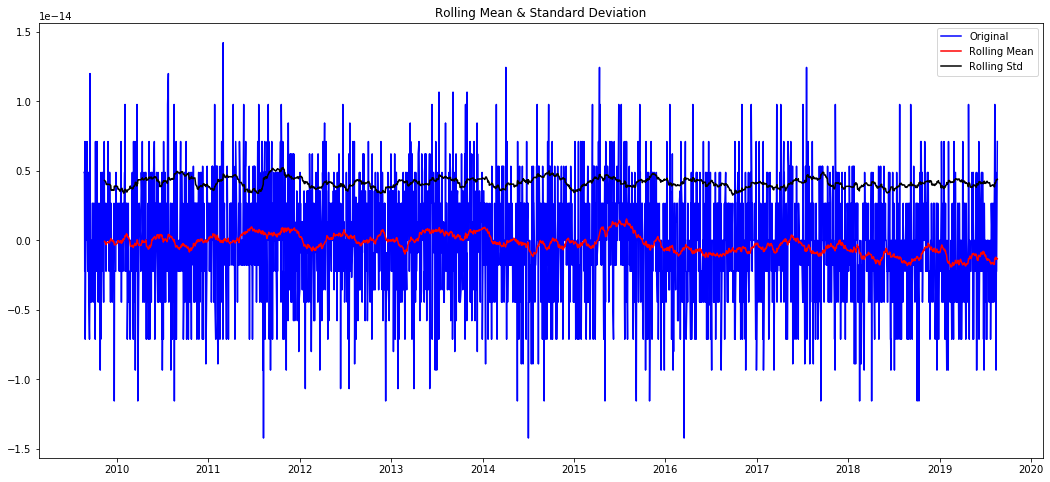

Results of Dickey-Fuller Test:
Test Statistic                  -28.068237
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2527.000000
Critical Value (1%)              -3.432940
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


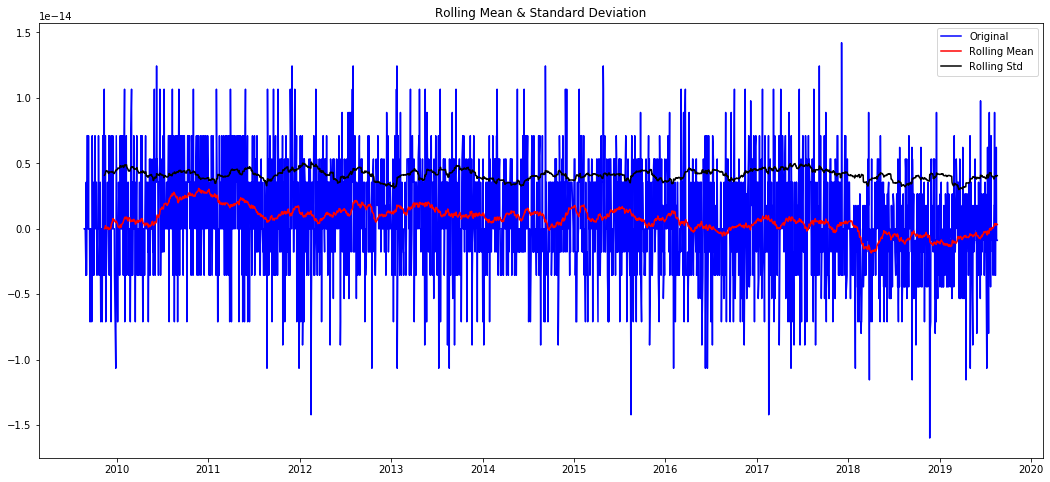

Results of Dickey-Fuller Test:
Test Statistic                  -27.749411
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


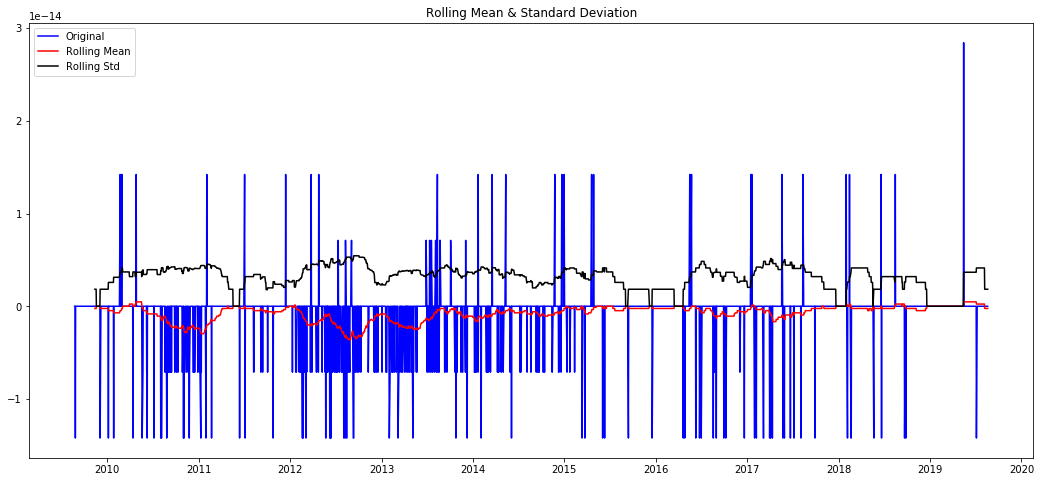

Results of Dickey-Fuller Test:
Test Statistic                  -26.283199
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


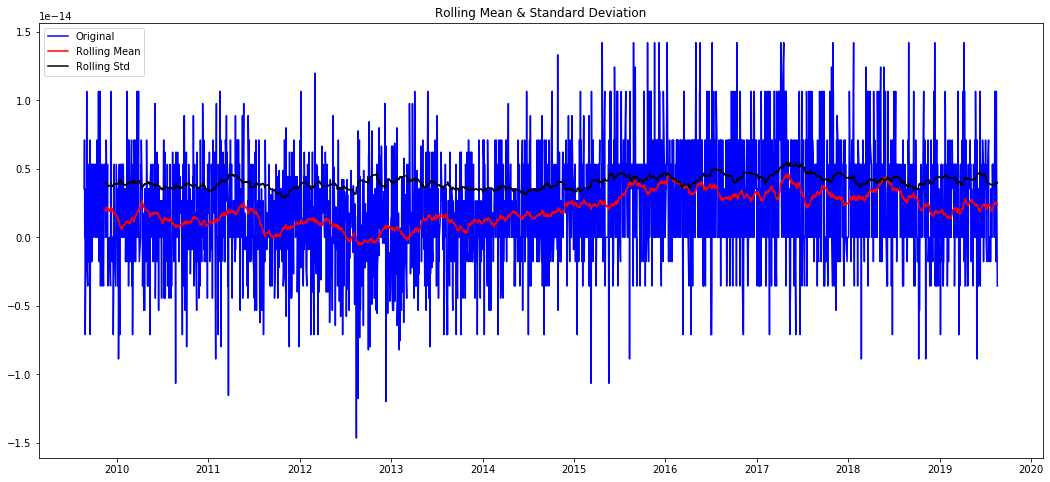

Results of Dickey-Fuller Test:
Test Statistic                  -23.681427
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


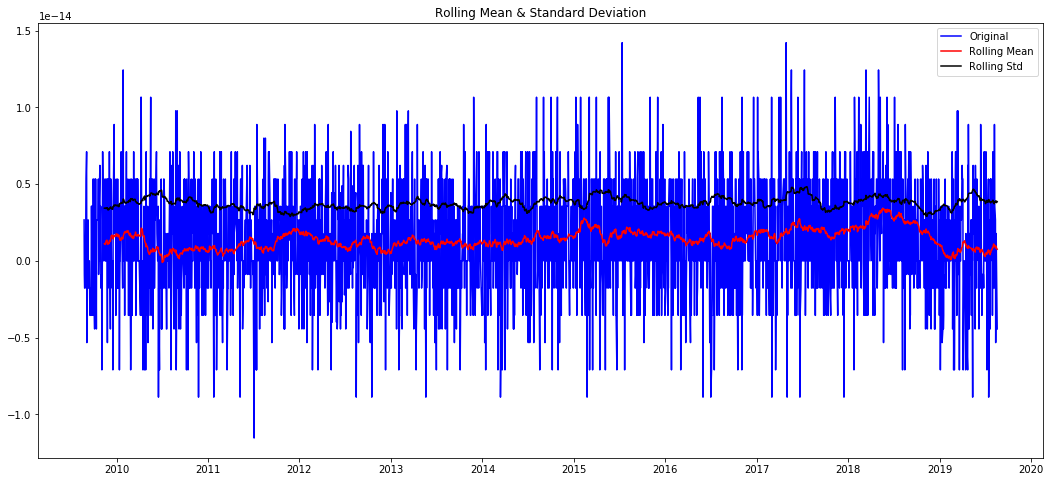

Results of Dickey-Fuller Test:
Test Statistic                  -27.497723
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


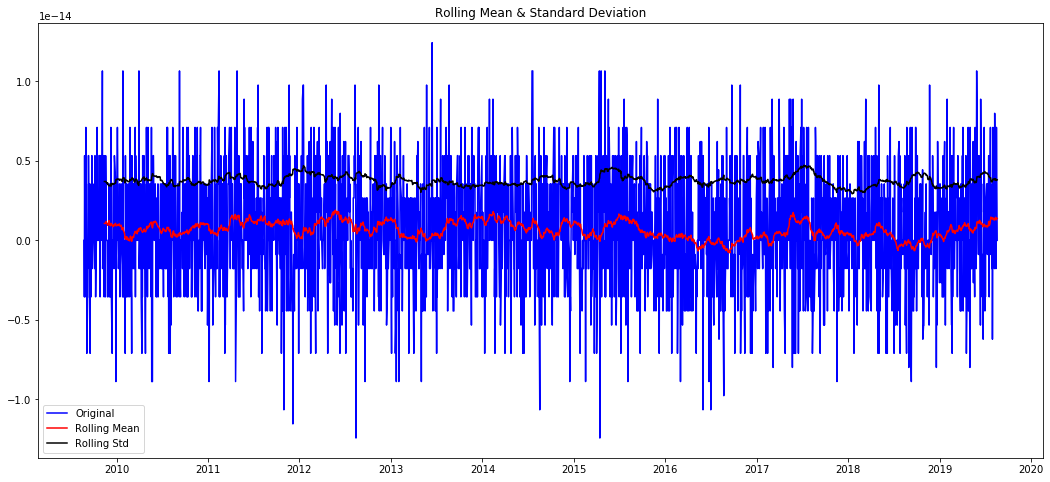

Results of Dickey-Fuller Test:
Test Statistic                  -27.590885
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


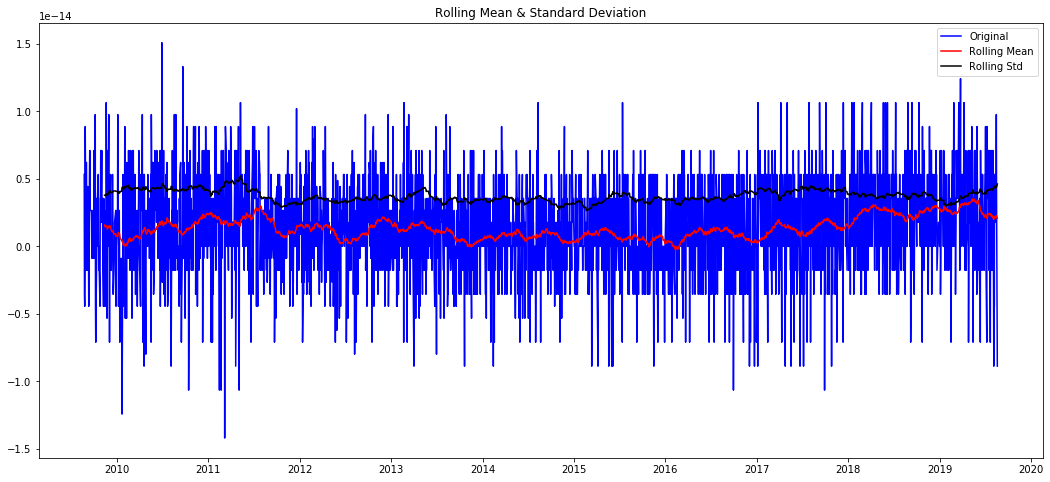

Results of Dickey-Fuller Test:
Test Statistic                  -27.716742
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    2528.000000
Critical Value (1%)              -3.432939
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


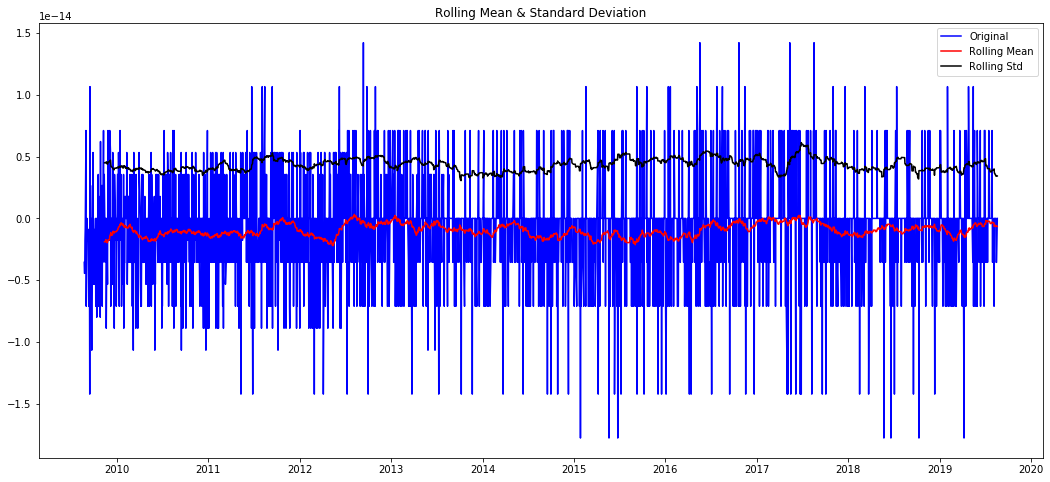

Results of Dickey-Fuller Test:
Test Statistic                  -32.399451
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2527.000000
Critical Value (1%)              -3.432940
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


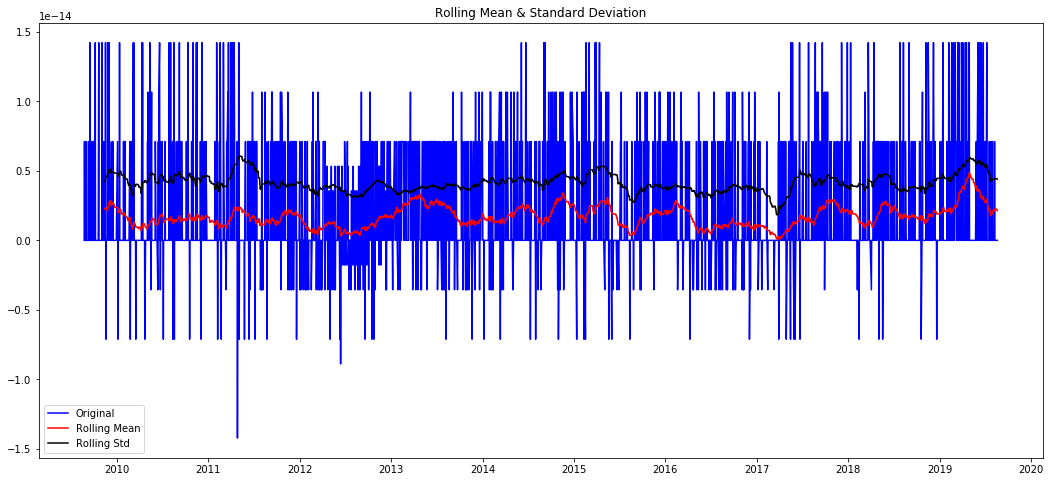

Results of Dickey-Fuller Test:
Test Statistic                  -28.094632
p-value                           0.000000
#Lags Used                       25.000000
Number of Observations Used    2528.000000
Critical Value (1%)              -3.432939
Critical Value (5%)              -2.862684
Critical Value (10%)             -2.567379
dtype: float64


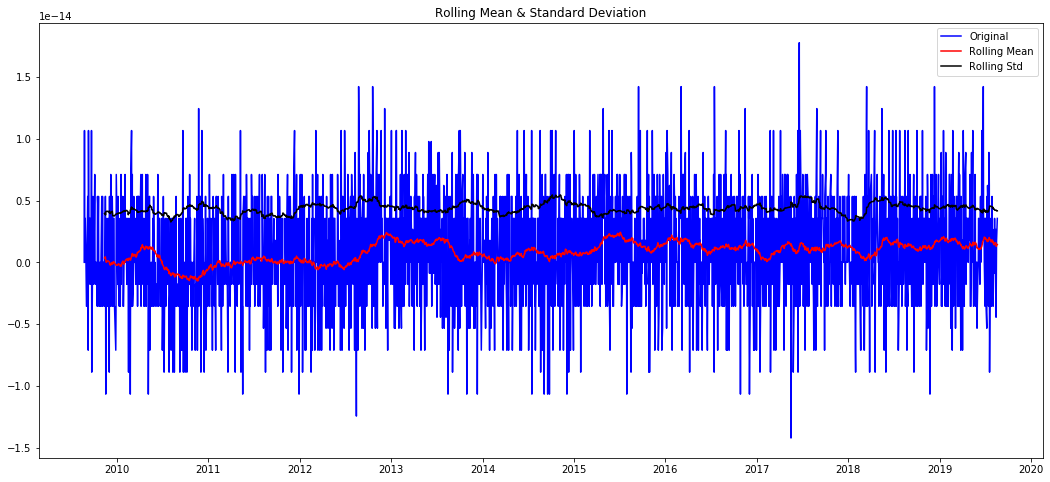

Results of Dickey-Fuller Test:
Test Statistic                  -28.905887
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


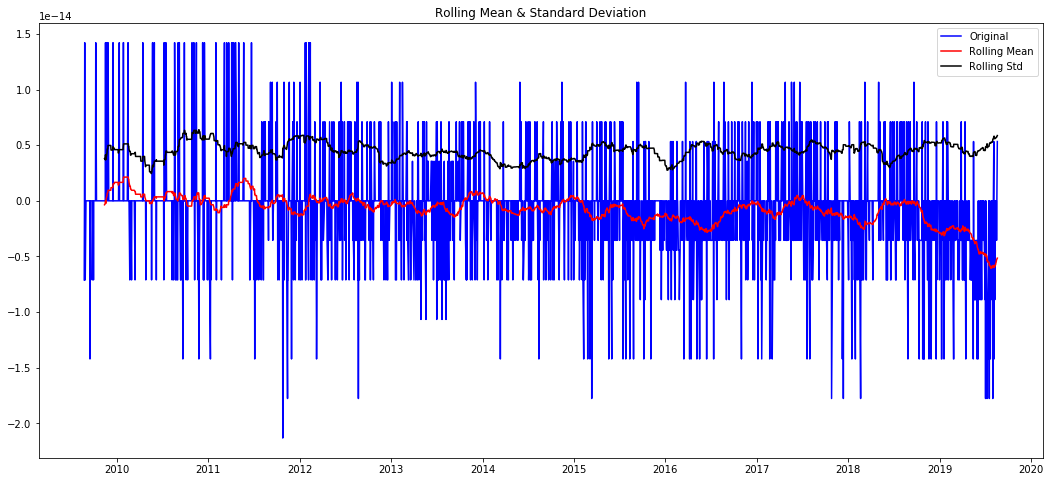

Results of Dickey-Fuller Test:
Test Statistic                  -21.235761
p-value                           0.000000
#Lags Used                       27.000000
Number of Observations Used    2526.000000
Critical Value (1%)              -3.432941
Critical Value (5%)              -2.862685
Critical Value (10%)             -2.567379
dtype: float64


In [25]:
decomposition = seasonal_decompose(df_ibex, freq=1)
for i in df_ibex.columns:
#    decomposition = seasonal_decompose(df_ibex, freq=1) #decomposing with the method
#separing in variables all the results from decomposition.
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    test_stationarity(residual, i)